# 준비단계


## train, test 파일 다운로드


데이콘 측에서 제공한 **'신용카드 사용자 연체 예측 프로젝트'의 데이터**에는 **3개의 csv 파일**이 있습니다.

csv는 Comma-Separated Values의 약자로, 데이터를 쉼표(,)로 구분하여 저장한 파일 형식이지요.
<br><br>
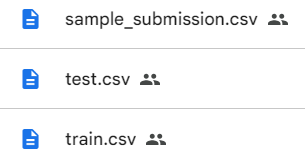

1. **train.csv** : 데이터 분석의 대상이자, 이를 기반으로 만든 모델을 학습하기 위한 데이터 <br>
2. **test.csv** : train한 모델로 정답을 예측하기 위한 데이터 <br>
3. **sample_submission.cs** : 예측한 정답을 제출하기 위한 데이터 <br><br>

저희는 주어진 데이터를 쉽게 사용하기 위해 제공된 train, test 파일을 구글 드라이브에 넣어두었는데요, <br>
업로드한 데이터에서 **공유 버튼**을 누르면 나오는 링크를 사용한다면 편하게 다운로드 받을 수 있겠죠?


 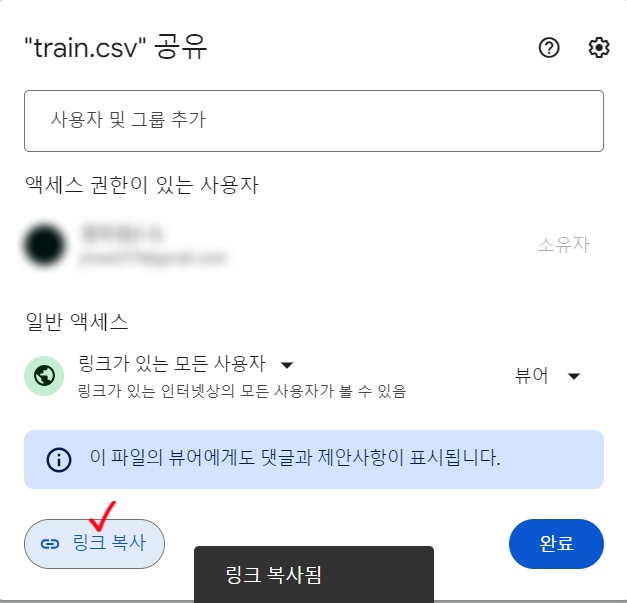

<br>링크의 예시로

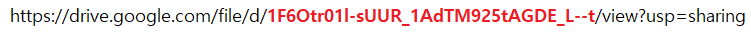
<br><br>

이렇게 있다면, 빨간색 부분을 `!gdown` 뒤에 붙여주시면 됩니다.

In [1]:
!gdown 1F6Otr01l-sUUR_1AdTM925tAGDE_L--t
!gdown 13lNIGs3wsD0mZF4OauV4GhZQHniNjK6d

Downloading...
From: https://drive.google.com/uc?id=1F6Otr01l-sUUR_1AdTM925tAGDE_L--t
To: /content/train.csv
100% 3.47M/3.47M [00:00<00:00, 169MB/s]
Downloading...
From: https://drive.google.com/uc?id=13lNIGs3wsD0mZF4OauV4GhZQHniNjK6d
To: /content/test.csv
100% 1.28M/1.28M [00:00<00:00, 109MB/s]


## 패키지 설치

이후에 OrdinalEncoder를 사용하기 위한 category_encoders 패키지를 설치해 주었습니다.

In [2]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.0 MB/s eta 0:00:00


## 패키지 불러오기

데이터 분석과 머신러닝 모델링 작업을 위한 다양한 라이브러리와 도구들도 불러와야겠죠?

```from 모듈이름 import 항목```  형태로 해당 모듈 내에서 필요한 항목 즉 함수나 클래스 등을 가져옵니다.

<br>

Seaborn, Matplotlib와 같은 **데이터 시각화**를 위한 라이브러리, 데이터 분할 및 전처리 그리고 모델 평가 및 선택 등을 하기 위한 **scikit-learn** 라이브러리, LightGBM, StackingClassifier 등의 분류 모델을 사용하기 위한 **분류 모델**  라이브러리, 마지막으로 경고 메시지 무시 설정을 위한 warnings 등을 import하였습니다.



In [1]:
# Core
import os, math
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, log_loss
from category_encoders.ordinal import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# 분류 모델
from lightgbm import LGBMClassifier

# utils
import warnings
warnings.filterwarnings('ignore')

## csv 불러오기

데이터 처리 및 분석을 위한 라이브러리인 pandas의 `read_csv()` 함수를 사용하여여, gdown한 데이터를 읽어와 데이터프레임으로 변환하였습니다.

In [4]:
df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# 1부. EDA(Exploratory Data Analysis, 탐색적 데이터 분석)

### **EDA란?**
> EDA 혹은 탐색적 데이터 분석이라고도 불리는 이 절차는, 데이터를 살펴보고 뜯어보는 과정에서 반복되는 패턴, 관계, 인사이트를 얻기 위해 필요합니다.
    <br>
    이미 잘 아는 분야, 데이터라면 "이렇게 하면 이런 결과가 나올 것이다"라는 가설을 가지고 바로 실험해볼 수도 있지만,
    그렇지 않을 때는 반드시 거쳐야 하는 과정입니다(물론 잘 아는 분야여도 EDA를 통해서 새로운 정보를 얻을 수도 있구요!)
    <br>
    코드를 작성해야 하는 일이 늘어나 부담이 될 수는 있지만, 섣불리 건너뛰었다가는 데이터에 대한 이해 부족으로 다시 EDA를 하러 돌아오는 불상사가 발생할 수 있으니,
    조금만 힘내서 EDA를 해보자구요.
    
<br>
<br>

---

##### >> EDA가 궁금하신 분들을 위해, 데이콘에 소개된 양질의 게시글들을 추천해드릴게요!

| URL                                                                                                                                  | 작성자    | 추천사유                                                                                                                                                                                       |
|--------------------------------------------------------------------------------------------------------------------------------------|-----------|------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| [[EDA] 데이터 분석 입문자를 위한 데이터 살펴보기](https://dacon.io/competitions/official/236147/codeshare/8682)                      | DACONIO   | 데이콘에서 제공하는 EDA baseline 코드입니다.  <br><br> 데이터와 주제는 다르지만, EDA의 필수요소라고 할 수 있는 내용들이  <br>들어가있기 때문에 추천드려요!                                     |
| [[데이썬☀️_3편] 🔍EDA (탐색적 데이터 분석) 사용 설명서 (1) - EDA & 통계치 분석](https://dacon.io/codeshare/4899)                       | 므인      | 기본적인 EDA의 종류와 유형부터 이상치 처리, 결측치와 같은 통계치 분석에 대한 내용도 일목요연하게 정리되어 있습니다. <br><br> 데이터 분석 입문자 분들께는 좋은 참고자료가 될 것이기에 추천드립니다. |
| [ 데이콘의 경진대회 수상작들 중에 PDF로 만들어진 내용을 슬라이드 쉐어에 모아 봤습니다. ](https://dacon.io/forum/409145?dtype=recent) | DATA MONK | 해당 게시글에 시각화 우수 사례들이 많이 소개되어 있습니다.  <br><br> 실제 프로젝트, 대회에서는 어떻게 데이터를 시각화하는지 궁금하다면 꼭 확인해보세요.                                            |

## 데이터 이해

저희 팀은 주어진 데이터가 신용카드 회사에서 고객으로부터 수집한 것이며, 각각의 데이터(row)는 수집일을 기준으로 기재되었음을 가정했습니다.

### feature 파악

이에 따라 파악하거나 유추한 각 feature의 의미는 다음과 같습니다.

|  feature    | 의미                                              | 비고                             |
|-------------|---------------------------------------------------|----------------------------------|
| gender      |  성별                                             |                                  |
| car         |  차량 소유 여부                                   |                                  |
| realty      |  부동산 소유 여부                                 |                                  |
| child_num   |  자녀 수                                          |                                  |
| income_total |  연간 소득                                        |                                  |
| income_type |  소득 분류                                        |                                  |
| edu_type    |  교육 수준                                        |                                  |
| family_type |  결혼 여부                                        |                                  |
| house_type  |  생활 방식                                        |                                  |
| DAYS_BIRTH  |  출생일                                           | 데이터 수집일 기준 이벤트 발생일 |
| DAYS_EMPLOYED |  업무 시작일                                      | 데이터 수집일 기준 이벤트 발생일 |
| FLAG_MOBIL  |  핸드폰 소유 여부                                 |                                  |
| work_phone  |  업무용 전화 소유 여부                            |                                  |
| phone       |  가정용 전화 소유 여부                            |                                  |
| email       |  이메일 소유 여부                                 |                                  |
| occyp_type  |  직업 유형                                        |                                  |
| family_size |  가족 규모                                        |                                  |
| begin_month |  신용카드 발급 월                                 | 데이터 수집일 기준 이벤트 발생일 |
| credit      |  사용자의 신용카드 대금 연체를 기준으로 한 신용도 | 낮을수록 높은 신용도             |
<br>
<br>
#### ▸ '데이터 수집일 기준 이벤트 발생일'에 대해서
> 'DAYS_BIRTH'의 경우, `수집일 - 생년월일(일 단위)`로 계산되기 때문에 음수의 값을 지닙니다.
  가령 수집일 하루 전에 태어난 사람이 있다면 `-1`로 기재될 것입니다.

<br>

▸ [데이콘 측에서 설명한 데이터 변수](https://dacon.io/competitions/official/235713/talkboard/402821?page=1&dtype=recent)


## 기본정보 확인

데이터프레임에서 처음 몇 개의 행만 출력해볼까요?<br> `df.head()`는 데이터프레임의 구조와 내용을 빠르게 확인하는 데 쓰입니다.<br>
처음 5개의 행을 출력하는 것이 기본값이지만, 원하는 개수를 인자로 넣어 출력할 행의 개수를 조정할 수도 있어요!<br> 예를 들어, `df.head(10)`로는 처음 10개의 행을 출력할 수 있겠죠?

In [5]:
df.head(10)

index gender car reality  child_num  income_total           income_type  \
0      0      F   N       N          0      202500.0  Commercial associate   
1      1      F   N       Y          1      247500.0  Commercial associate   
2      2      M   Y       Y          0      450000.0               Working   
3      3      F   N       Y          0      202500.0  Commercial associate   
4      4      F   Y       Y          0      157500.0         State servant   
5      5      F   N       Y          2      270000.0               Working   
6      6      F   N       N          0      315000.0               Working   
7      7      M   N       Y          0      270000.0  Commercial associate   
8      8      M   Y       Y          1      180000.0  Commercial associate   
9      9      F   N       Y          0      103500.0               Working   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   
2               Higher education         Married    House / apartment   
3  Secondary / secondary special         Married    House / apartment   
4               Higher education         Married    House / apartment   
5  Secondary / secondary special         Married    House / apartment   
6  Secondary / secondary special       Separated    House / apartment   
7  Secondary / secondary special         Married    House / apartment   
8               Higher education         Married    House / apartment   
9  Secondary / secondary special         Married    House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email  \
0      -13899          -4709           1           0      0      0   
1      -11380          -1540           1           0      0      1   
2      -19087          -4434           1           0      1      0   
3      -15088          -2092           1           0      1      0   
4      -15037          -2105           1           0      0      0   
5      -13413          -4996           1           0      0      1   
6      -17570          -1978           1           0      0      1   
7      -14896          -5420           1           0      0      1   
8      -15131          -1466           1           0      0      1   
9      -15785          -1308           1           0      0      0   

              occyp_type  family_size  begin_month  credit  
0                    NaN          2.0         -6.0     1.0  
1               Laborers          3.0         -5.0     1.0  
2               Managers          2.0        -22.0     2.0  
3            Sales staff          2.0        -37.0     0.0  
4               Managers          2.0        -26.0     2.0  
5  High skill tech staff          4.0        -18.0     1.0  
6             Core staff          1.0        -41.0     2.0  
7                Drivers          2.0        -53.0     0.0  
8                    NaN          3.0        -38.0     2.0  
9         Medicine staff          2.0         -5.0     2.0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

> **df.info()**로는 각 feature는 어떤 데이터 타입인지, 결측치는 없는지 출력값에서 확인할 수 있어요.

- 총 데이터 수: 출력값 상단의 RangeIndex 확인
- 결측치 여부: 'RangeIndex'와 'Non-Null Count' 비교
- 데이터 타입: Dtype 확인 (문자열은 object로 확인)

## 통계치 확인

### 결측치 확인

데이터프레임에서 각 열(column)별로 누락된 값(null 값)의 개수를 확인하기 위해 `df.isnull().sum()`을 사용해봅시다!

In [7]:
df.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

<Axes: >

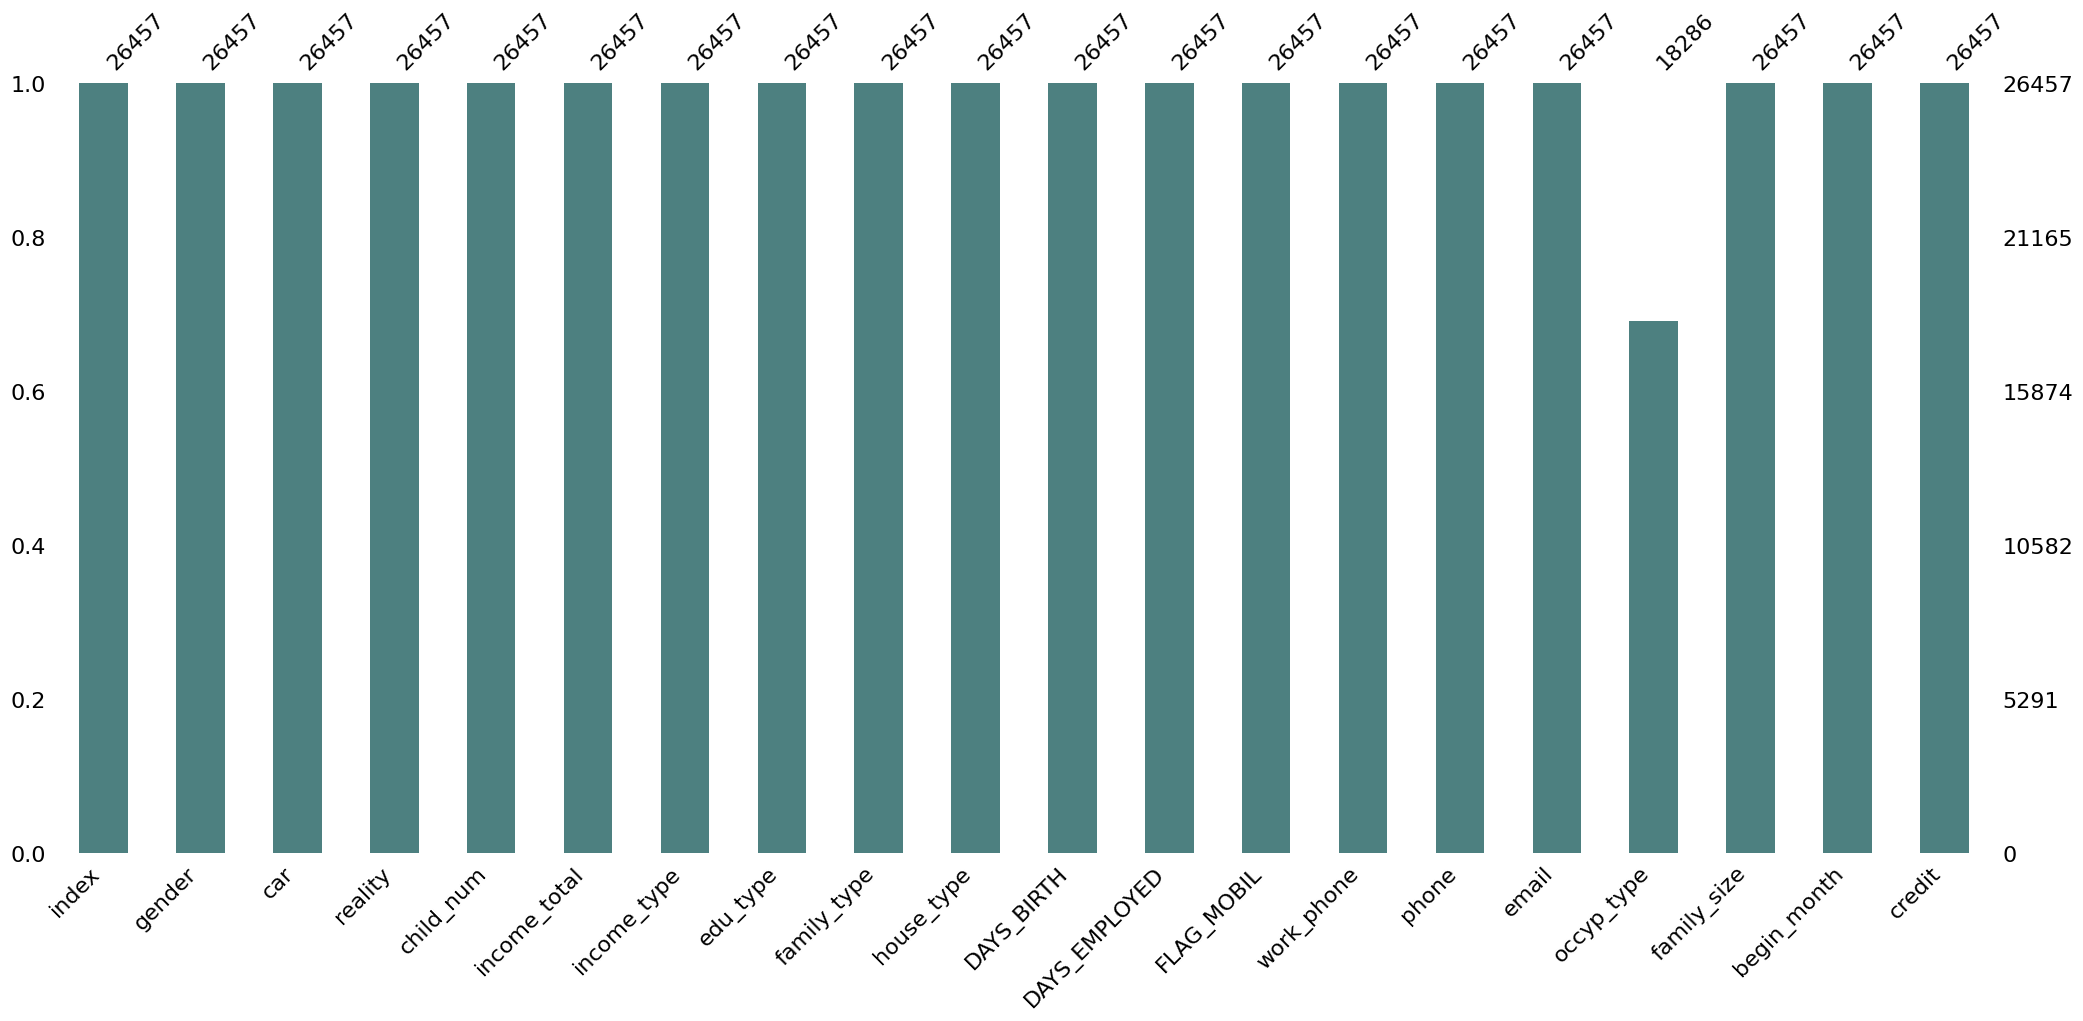

In [8]:
msno.bar(df=df, color=(0.3, 0.5, 0.5))

결측치는 occyp_type에만 존재하는 것을 확인할 수 있었어요!
<br><br>
하지만 여러 컬럼에 다양한 수의 결측치가 존재하는 데이터라면, 결측치를 한눈에 볼 수 있도록 시각화를 하는 것이 좋겠죠?
<br>
그럴 때는 missingno 라이브러리의 msno 모듈을 사용하여 누락된 데이터를 시각화하는 것이 유용할 수 있어요. bar 함수는 막대 그래프를 사용하여 데이터프레임의 각 열별로 누락된 데이터의 비율을 보여주고, 'df='에는 즉 시각화할 데이터프레임을 넣어주면 됩니다.<br> `color=(0.3, 0.5, 0.5)` 부분은 그래프의 색상을 지정하는 인자로, 저희는 (0.3, 0.5, 0.5)라는 RGB 튜플을 사용해보았어요. <br>아래의 코드를 통해 어떤 열이 얼마나 많은 결측치를 가지고 있는지 한 눈에 확인할 수 있습니다.

### 중복값, 고유값

index를 제외한 모든 feature가 동일한 데이터가 존재하므로, **동일 인물이 여러 장의 신용카드를 발급했을 가능성**을 고려해야 합니다.<br> 또한, 유일값 확인을 통해 FLAG_MOBIL은 모든 값이 동일하므로 불필요한 열인 것을 확인할 수 있습니다.

고유값 분포를 더 상세히 살펴봅니다!

In [9]:
print("index를 포함한 중복값 :", df.duplicated().sum())
print("index를 제외한 중복값 :", df.drop(columns = ['index']).duplicated().sum())
print("index, credit을 제외한 중복값 :", df.drop(columns = ['index', 'credit']).duplicated().sum())
print("=" * 50)
print("각 feature별 고유값 확인 :")

display(df.nunique())

index를 포함한 중복값 : 0
index를 제외한 중복값 : 1634
index, credit을 제외한 중복값 : 2353
각 feature별 고유값 확인 :


index            26457
gender               2
car                  2
reality              2
child_num            9
income_total       249
income_type          5
edu_type             5
family_type          5
house_type           6
DAYS_BIRTH        6621
DAYS_EMPLOYED     3470
FLAG_MOBIL           1
work_phone           2
phone                2
email                2
occyp_type          18
family_size         10
begin_month         61
credit               3
dtype: int64

In [10]:
def feature_unique(feature):
    print(f'--- {feature} ---')
    print(f''' {df[feature].nunique()} | {df[feature].unique()}\n''')

for feature in df.keys():
    feature_unique(feature)

--- index ---
 26457 | [    0     1     2 ... 26454 26455 26456]

--- gender ---
 2 | ['F' 'M']

--- car ---
 2 | ['N' 'Y']

--- reality ---
 2 | ['N' 'Y']

--- child_num ---
 9 | [ 0  1  2  3  4  5 14 19  7]

--- income_total ---
 249 | [ 202500.   247500.   450000.   157500.   270000.   315000.   180000.
  103500.   193500.   135000.   216000.   225000.   405000.   112500.
  121500.   585000.    90900.    99000.    67500.   292500.    90000.
  495000.    54000.   306000.   130500.   144000.   360000.    40500.
   81000.   351000.   184500.    45000.    79650.   153000.   126000.
  382500.   283500.   175500.   297000.   387000.   337500.   256500.
   72000.   540000.   155250.   189000.   139500.   459000.   720000.
  252000.   171000.   427500.    78750.    94500.   562500.   238500.
  630000.    76500.   301500.   229500.   148500.   166500.   463500.
  432000.   117000.   787500.   234000.   108000.   279000.   900000.
  378000.    31500.    29250.   211500.   207000.    49500.   

위의 출력결과를 기반으로 정리한 feature별 특징은 다음과 같습니다.
<br>

| feature      | feature type | nunique | note        |
|--------------|--------------|---------|-------------|
| gender       | categorical  |       2 | F, M        |
| car          | categorical  |       2 | N, Y        |
| reality      | categorical  |       2 | N, Y        |
| child_num    | numerical    |       9 | int         |
| income_total | numerical    |     249 | float       |
| income_type  | categorical  |       5 |             |
| edu_type     | categorical  |       5 | 학력수준    |
| family_type  | categorical  |       5 |             |
| house_type   | categorical  |       6 |             |
| DAYS_BIRTH   | numerical    |    6621 | int(음수)   |
| DAYS_EMPLOYED | numerical    |    3470 | int(음수)   |
| FLAG_MOBIL   | constant     |       1 |             |
| work_phone   | categorical  |       2 | 0, 1        |
| phone        | categorical  |       2 | 0, 1        |
| email        | categorical  |       2 | 0, 1        |
| occyp_type   | categorical  |      18 | 결측치 존재 |
| family_size  | numerical    |      10 | int         |
| begin_month  | numerical    |      61 | int(음수)   |
| credit       | categorical  |       3 | 0, 1, 2     |

### 요약정보

이번에는 수치형 데이터의 분포를 전체적으로 살펴보겠습니다. <br>
`df.describe()`를 이용하면 데이터프레임의 수치형 열에 대한 통계 정보를 계산하여 출력할 수 있어요. <br>평균, 표준편차, 최소값, 25번째 백분위수, 중간값, 75번째 백분위수, 최대값을 보여줍니다.

In [11]:
pd.options.display.float_format = "{:.2f}".format #소수점 두번째 자리까지 출력하는 코드
df.describe()

index  child_num  income_total  DAYS_BIRTH  DAYS_EMPLOYED  \
count 26457.00   26457.00      26457.00    26457.00       26457.00   
mean  13228.00       0.43     187306.52   -15958.05       59068.75   
std    7637.62       0.75     101878.37     4201.59      137475.43   
min       0.00       0.00      27000.00   -25152.00      -15713.00   
25%    6614.00       0.00     121500.00   -19431.00       -3153.00   
50%   13228.00       0.00     157500.00   -15547.00       -1539.00   
75%   19842.00       1.00     225000.00   -12446.00        -407.00   
max   26456.00      19.00    1575000.00    -7705.00      365243.00   

       FLAG_MOBIL  work_phone    phone    email  family_size  begin_month  \
count    26457.00    26457.00 26457.00 26457.00     26457.00     26457.00   
mean         1.00        0.22     0.29     0.09         2.20       -26.12   
std          0.00        0.42     0.46     0.29         0.92        16.56   
min          1.00        0.00     0.00     0.00         1.00       -60.00   
25%          1.00        0.00     0.00     0.00         2.00       -39.00   
50%          1.00        0.00     0.00     0.00         2.00       -24.00   
75%          1.00        0.00     1.00     0.00         3.00       -12.00   
max          1.00        1.00     1.00     1.00        20.00         0.00   

        credit  
count 26457.00  
mean      1.52  
std       0.70  
min       0.00  
25%       1.00  
50%       2.00  
75%       2.00  
max       2.00

`describe()`에서 확인할 수 있는 정보는 다음과 같습니다.<br>
*   child_num의 제 3 사분위 수와 max값 사이의 차이가 매우 커 이상치가 있음을 예상할 수 있습니다.
*   위와 동일한 이유로 family_size에도 이상치가 있음을 예상할 수 있습니다.
*   DAYS_EMPLOYED 는 고용되지 않은 상태를 충분히 큰 양수 값으로 표현했음을 알 수 있습니다.

<br><br>
앞서 나온 정보를 종합하여 원활한 EDA를 위해 다음과 같이 처리합니다.<br>
*   DAYS_EMPLOYED의 양수값을 0으로 통일
*   DAYS_EMPLOYED의 값을 년 단위로 전환, YEARS_EMPLOYED column 생성
*   DAYS_BIRTH 를 연 단위로 전환, age column 생성
*   FLAG_MOBIL, DAYS_EMPLOYED, DAYS_BIRTH 를 드랍
*   numeric feature / categorical feature / label을 구분

In [12]:
df.loc[df['DAYS_EMPLOYED'] > 0, 'DAYS_EMPLOYED'] = 0 # 0은 고용되지 않음을 의미하며, 1 이상은 '연차'를 의미
df['YEARS_EMPLOYED'] = (-df['DAYS_EMPLOYED'] + 364) // 365 # +364는 근무일이 0인 사람과 근무일이 1년 미만인 사람을 구분하기 위함
df['age'] = -df['DAYS_BIRTH'] // 365

df = df.drop(columns= ['FLAG_MOBIL', 'DAYS_BIRTH', 'DAYS_EMPLOYED'])
numerical = ['child_num', 'income_total','age','YEARS_EMPLOYED','family_size','begin_month']
categorical = ['gender','car','reality', 'income_type','edu_type','family_type', 'house_type','work_phone','phone','email','occyp_type']
label = ['credit']

### value 분포 확인

#### 범주형 변수 및 라벨(y값)의 분포

value의 분포를 feature 별로 살펴보겠습니다. <br> y값 또한 0, 1, 2 중 하나로, 범주형 값을 가지고 있기 때문에 함께 다루려고 합니다.

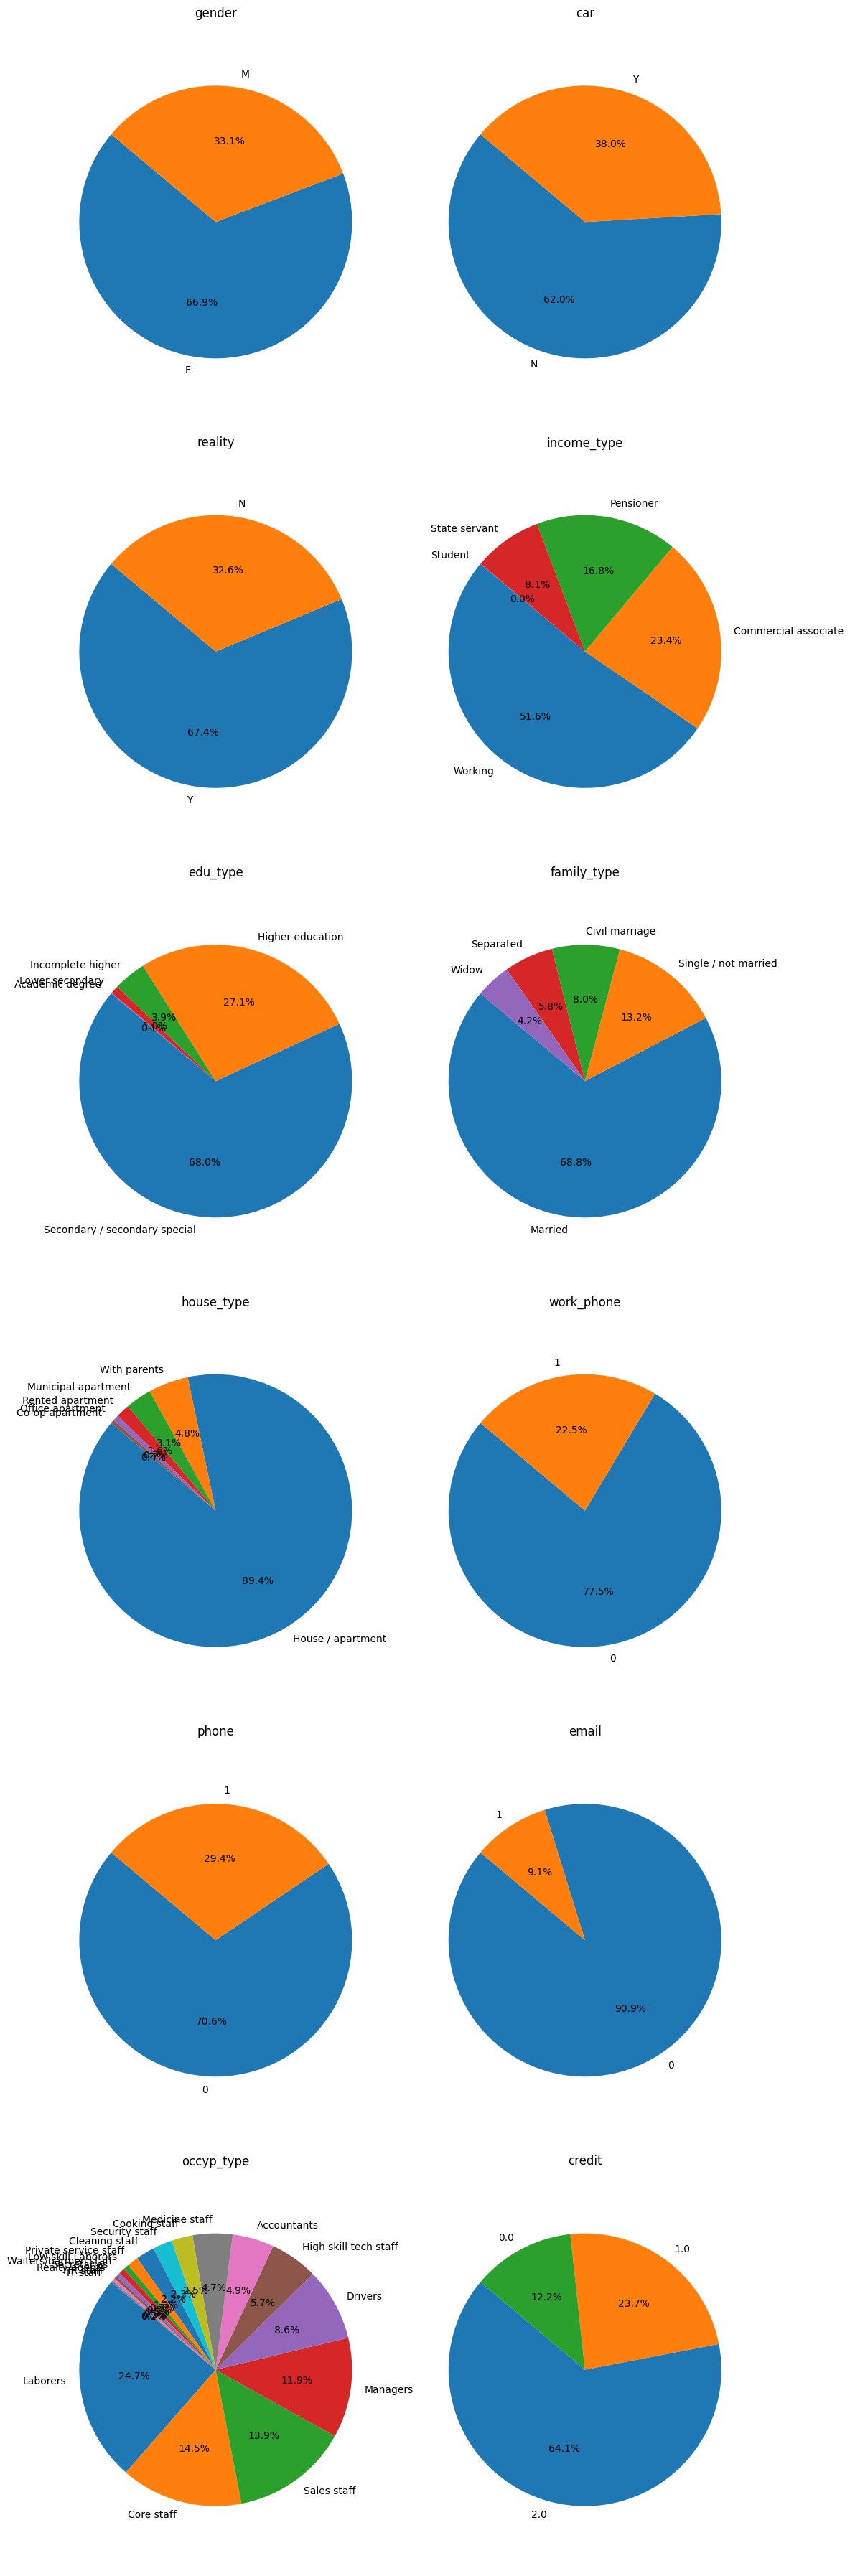

In [13]:
#categorical + label 의 value 분포
num_rows = len(categorical + label) // 2 + len(categorical + label) % 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))

for idx, feature in enumerate(categorical + label):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    category_counts = df[feature].value_counts()

    ax.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'{feature}')
    ax.axis('equal')

plt.tight_layout()
plt.show()

위에서 확인 가능한 정보는 다음과 같습니다.
- gender는 여성이 남성보다 많습니다.
- car는 소유한 사람보다 소유하지 않은 사람이 많습니다.
- reality는 소유한 사람보다 소유하지 않은 사람이 많습니다.
- income_type은 Working이 과반수입니다. Student가 극소수 존재합니다.
- edu_type은 Secondary / secondary special이 과반수입니다. Academic degree가 극소수 존재합니다.
- family_type은 Married가 과반수입니다.
- house_type은 House / apartment의 수가 압도적입니다.
- work_phone은 소유한 사람보다 소유하지 않은 사람이 많습니다.
- phone은 소유한 사람보다 소유하지 않은 사람이 많습니다.
- email은 대다수의 사람이 가지고 있지 않습니다. (혹은, 기재하지 않았습니다.)
- occyp_type은 비교적 다양하게 분포해있습니다.
- label인 credit의 경우, 신용도가 높은 이용자일 수록 수가 적습니다.

#### 연속형 변수(수치형 변수, numerical feature)의 분포

다음으로는 연속형 변수들을 살펴보겠습니다!

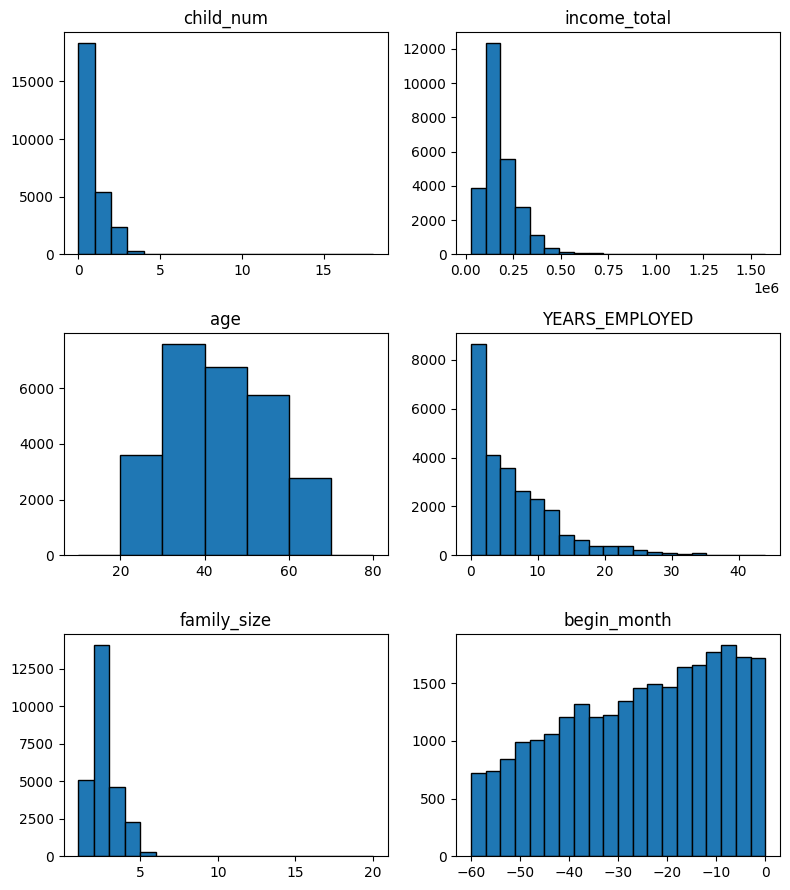

In [14]:
#numerical feature의 value 분포
num_rows = len(numerical) // 2 + len(numerical) % 2
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 3 * num_rows))


bin_values = {
    'child_num' : range(0,19,1),
    'age': range(10,81,10),
    'family_size' : range(1,21,1)
}

for idx, feature in enumerate(numerical):
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    bins = bin_values.get(feature, 20)

    ax.hist(df[feature], bins=bins, edgecolor='black')
    ax.set_title(f'{feature}')

plt.tight_layout()
plt.show()

위에서 확인 가능한 정보는 다음과 같습니다.
- child_num : 대다수의 사람들이 아이를 가지고 있지 않습니다.
- income_ total : 특정 구간에 다수 분포하며, 이상치가 존재합니다.
- age : 대부분의 이용자는 20대 중후반에서 60대 초중반 사이입니다.
- YEARS_EMPLOYED : 고용기간이 0이거나 짧은 사람이 압도적으로 많습니다.
- family_size : 특정 값에 대부분 분포해있습니다. 이상치가 존재합니다.
- begin_month : 고루 분포해있으며 이용기간이 길수록 이용자의 수가 줄어듭니다.

#### credit에 따른 범주형 변수들의 값 분포

y값인 credit에 따른 범주형 변수들의 값이 어떻게 분포하고 있는지도 중요하겠죠?

In [15]:
credit0 = df[df['credit']==0.0]
credit1 = df[df['credit']==1.0]
credit2 = df[df['credit']==2.0]

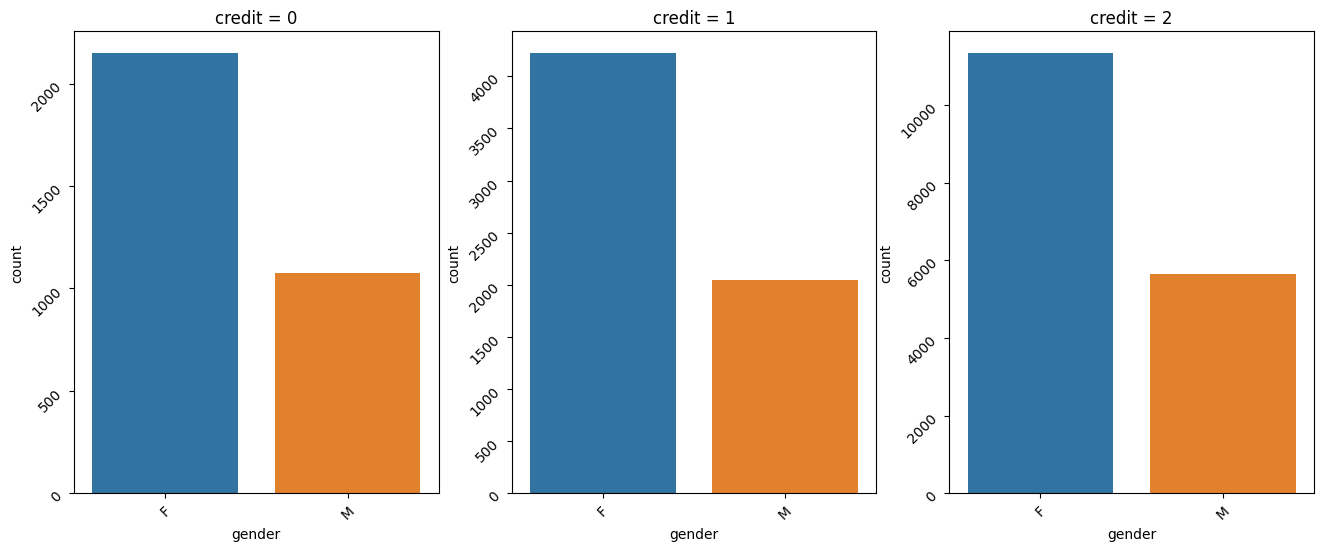

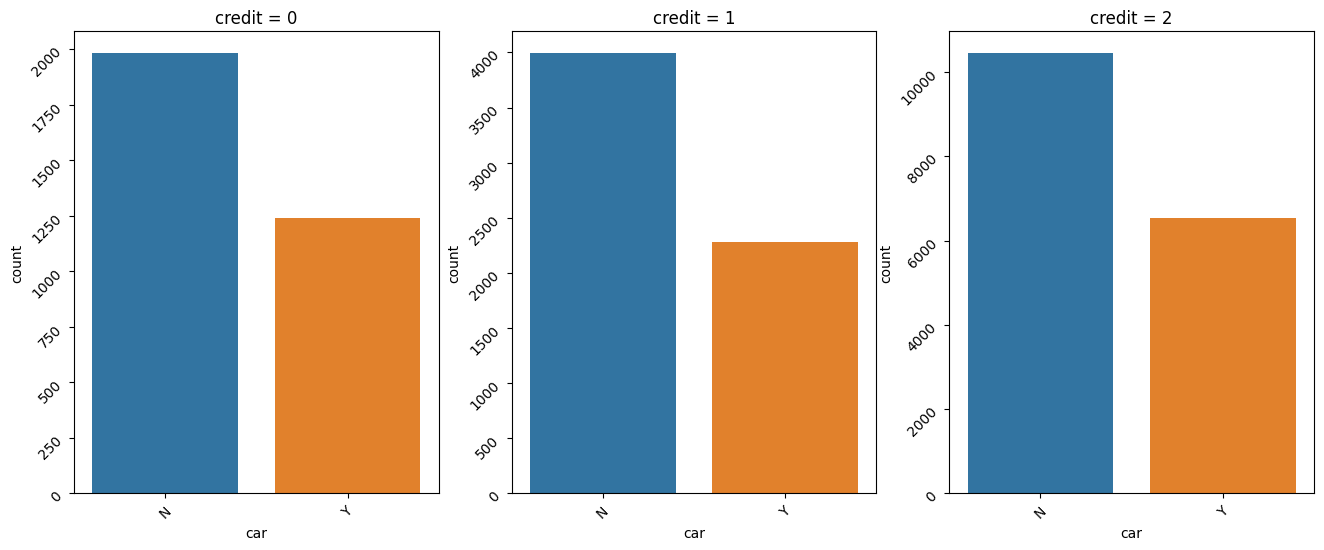

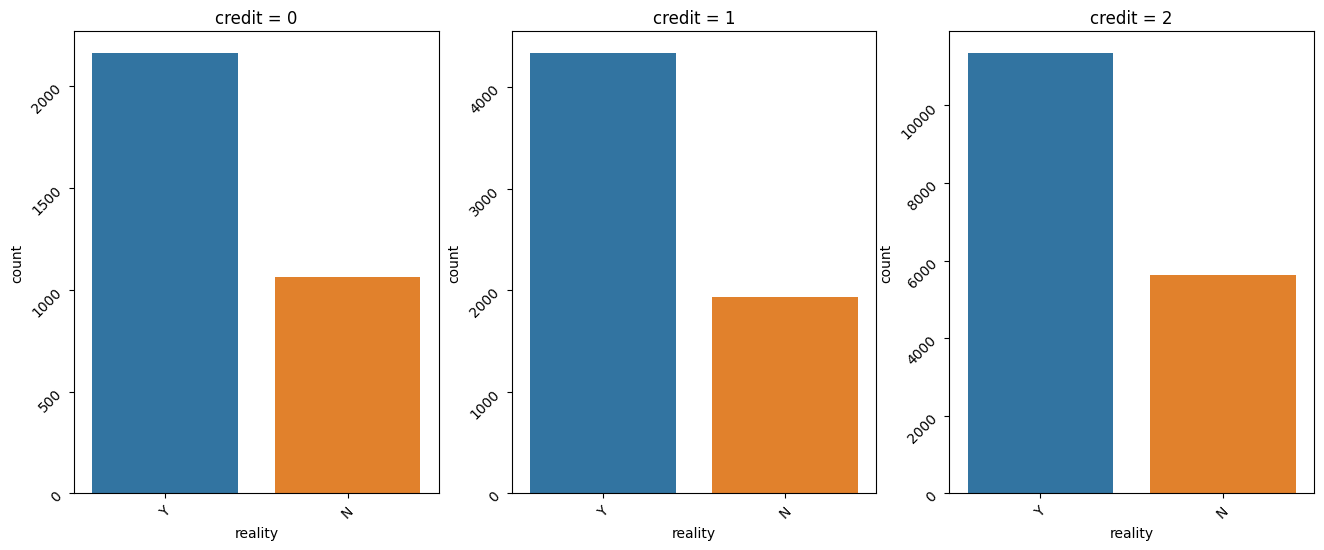

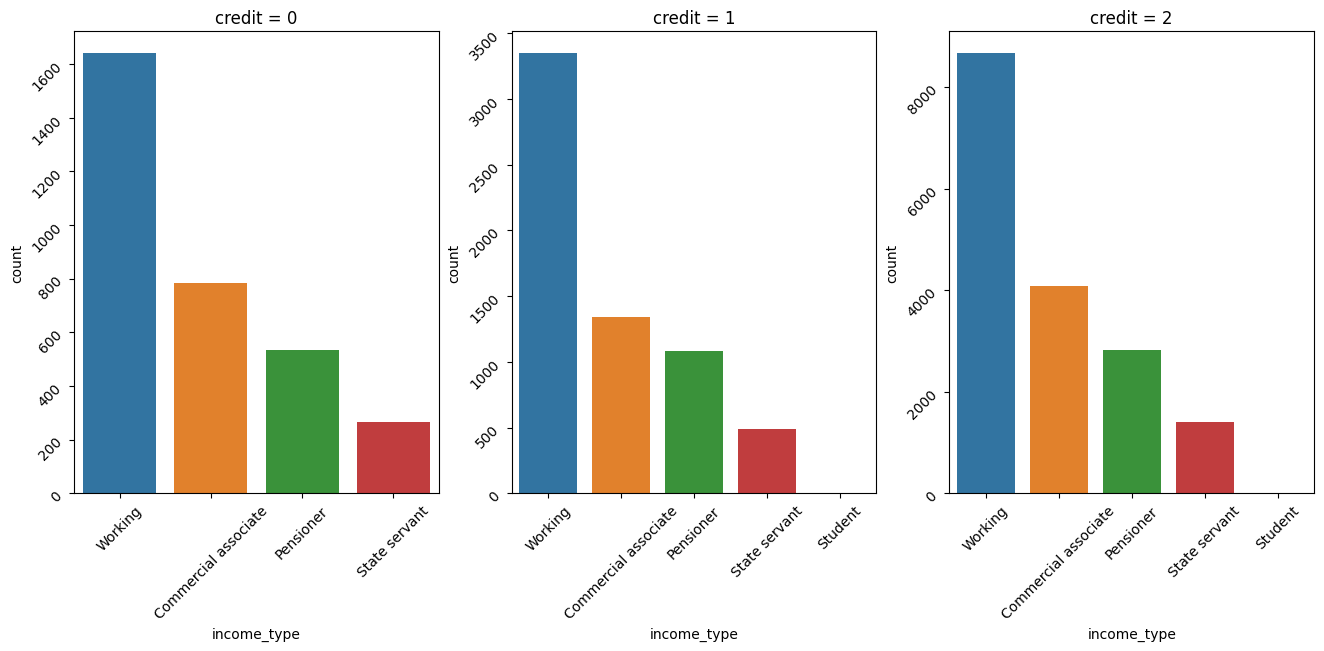

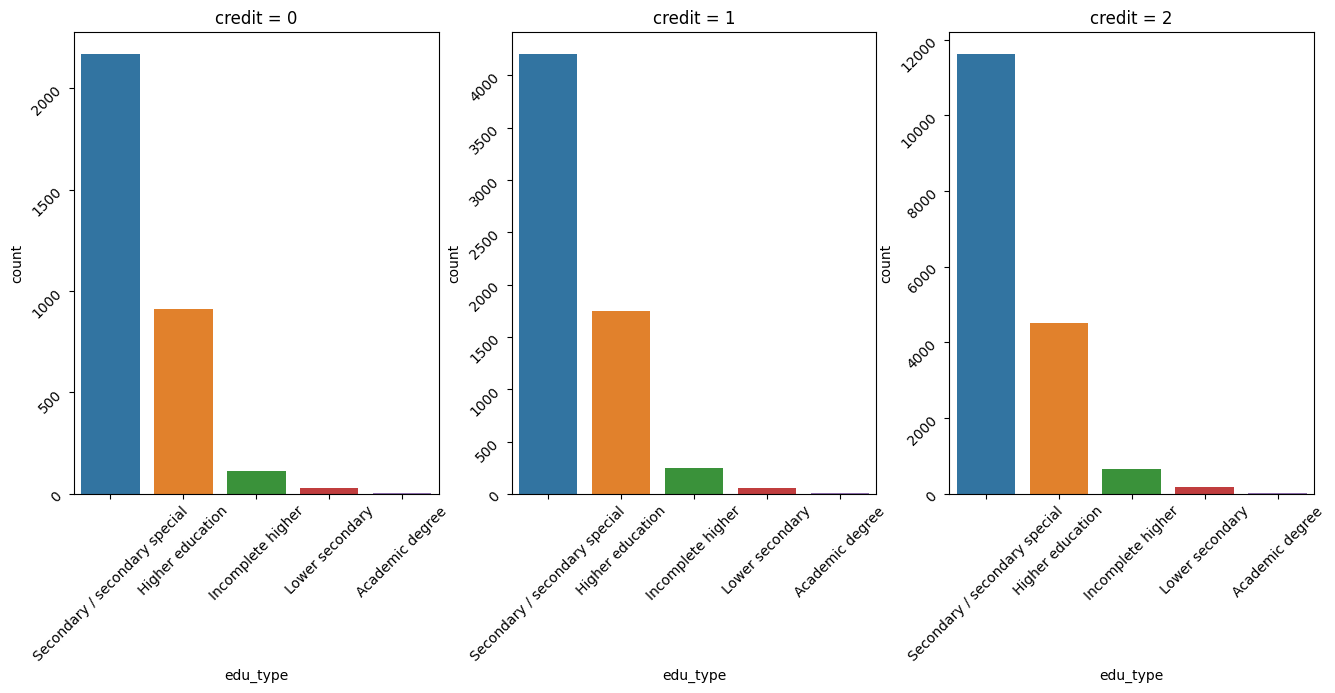

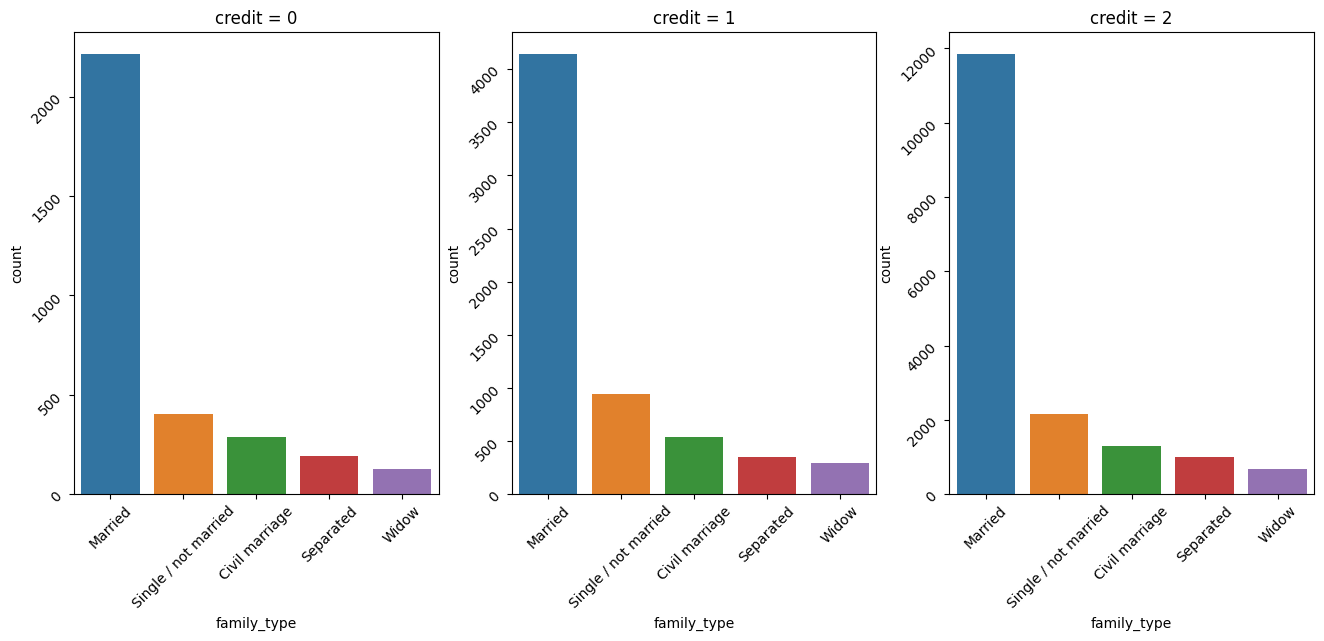

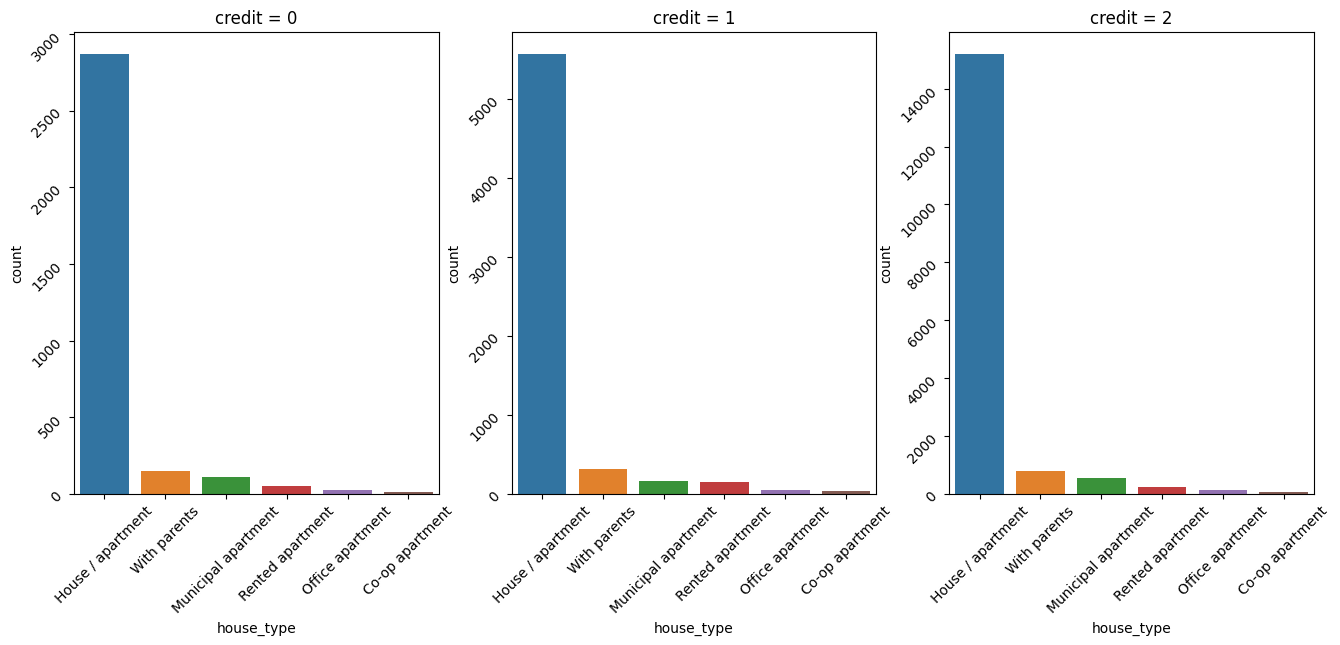

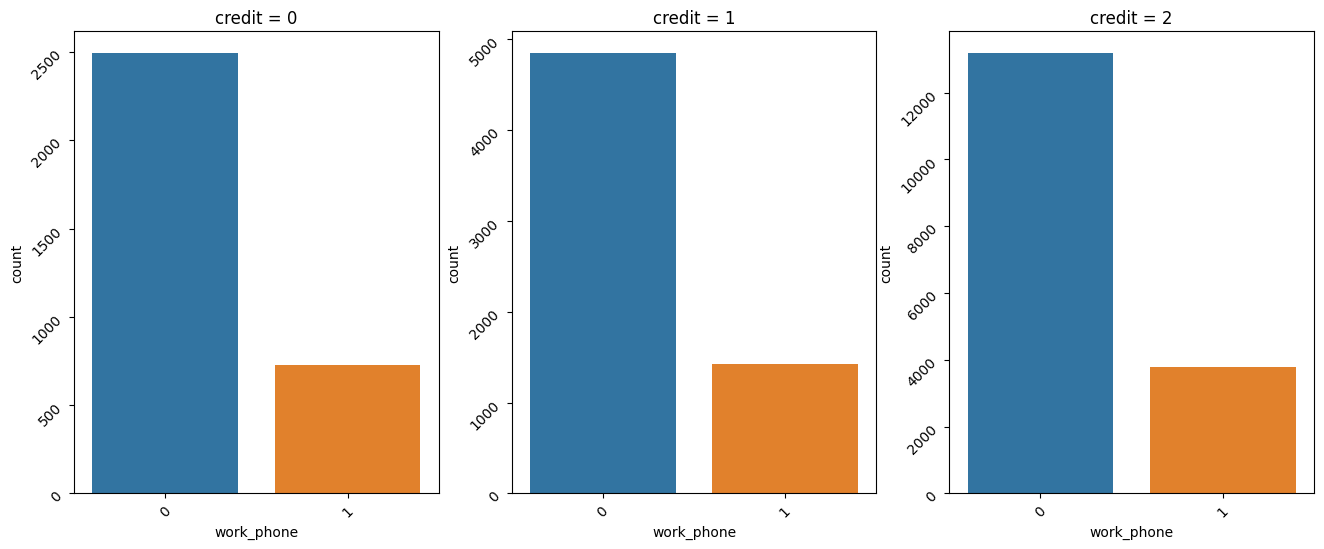

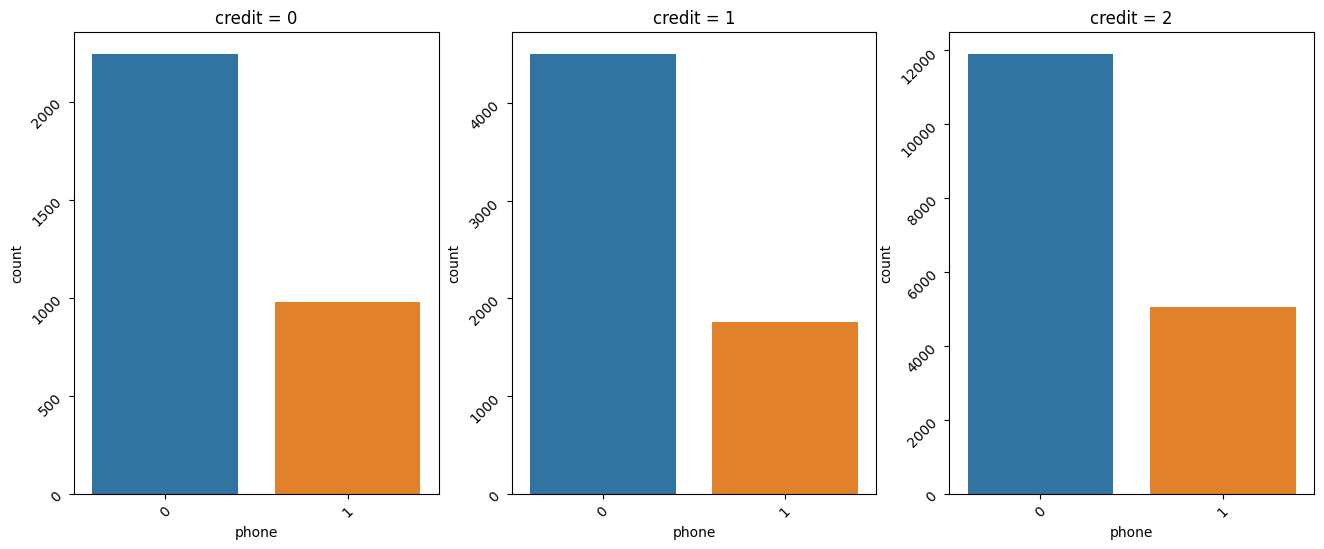

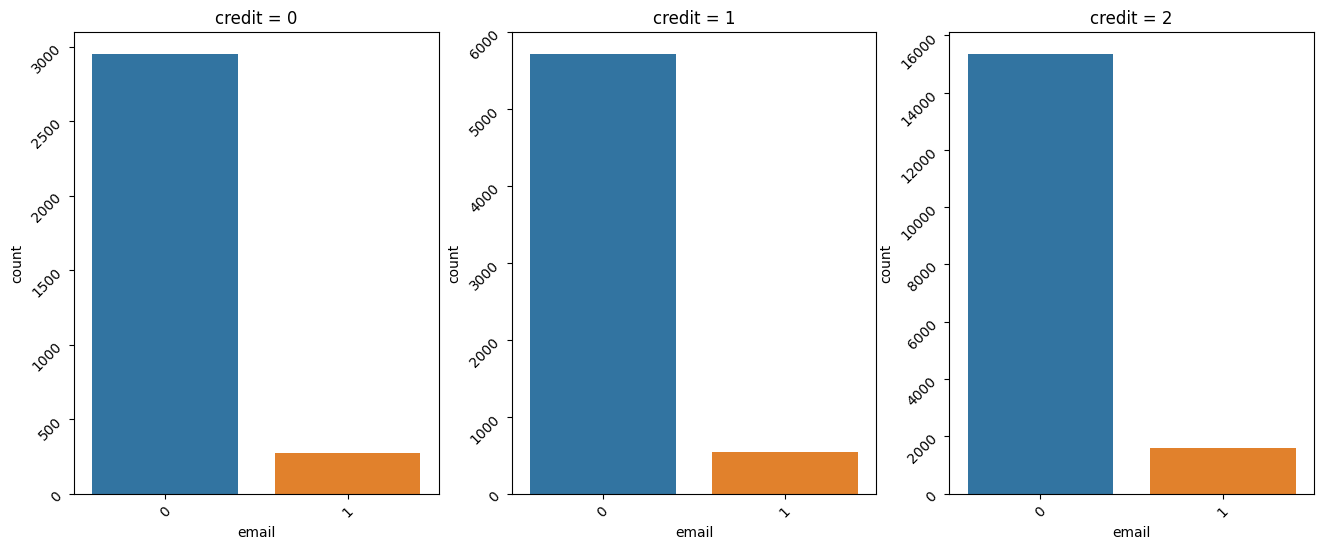

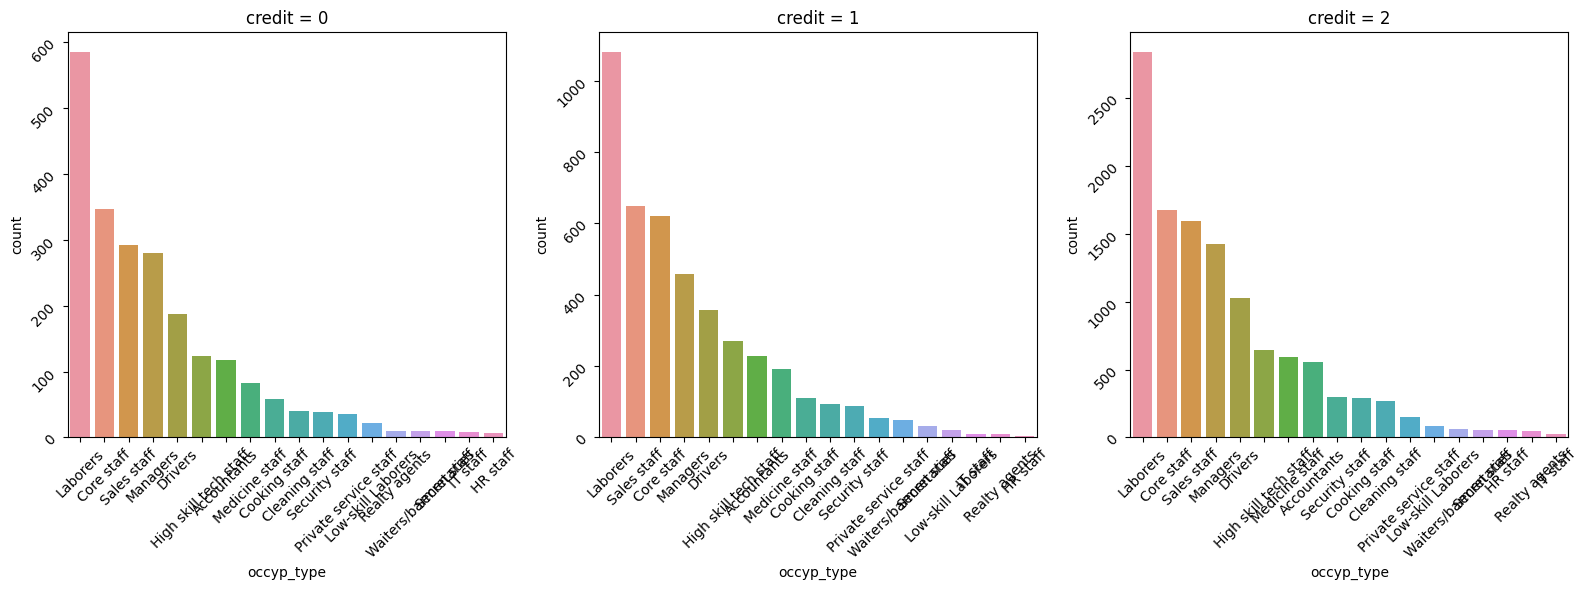

In [16]:
for column in categorical :
    f, ax = plt.subplots(1, 3, figsize=(16, 6))

    sns.countplot(x = column, data = credit0, ax = ax[0], order = credit0[column].value_counts().index)
    ax[0].set_title('credit = 0')
    ax[0].tick_params(rotation=45)

    sns.countplot(x = column, data = credit1, ax = ax[1], order = credit1[column].value_counts().index)
    ax[1].set_title('credit = 1')
    ax[1].tick_params(rotation=45)

    sns.countplot(x = column, data = credit2, ax = ax[2], order = credit2[column].value_counts().index)
    ax[2].set_title('credit = 2')
    ax[2].tick_params(rotation=45)

plt.tight_layout()
plt.show()

credit=0 그룹에 student가 없다는 사실 외에는 큰 특이사항이 없습니다.

#### 범주형 변수에 따른 credit 평균

참고를 위해 이번에는 반대로 범주형 변수에 따른 credit의 평균을 살펴보겠습니다.

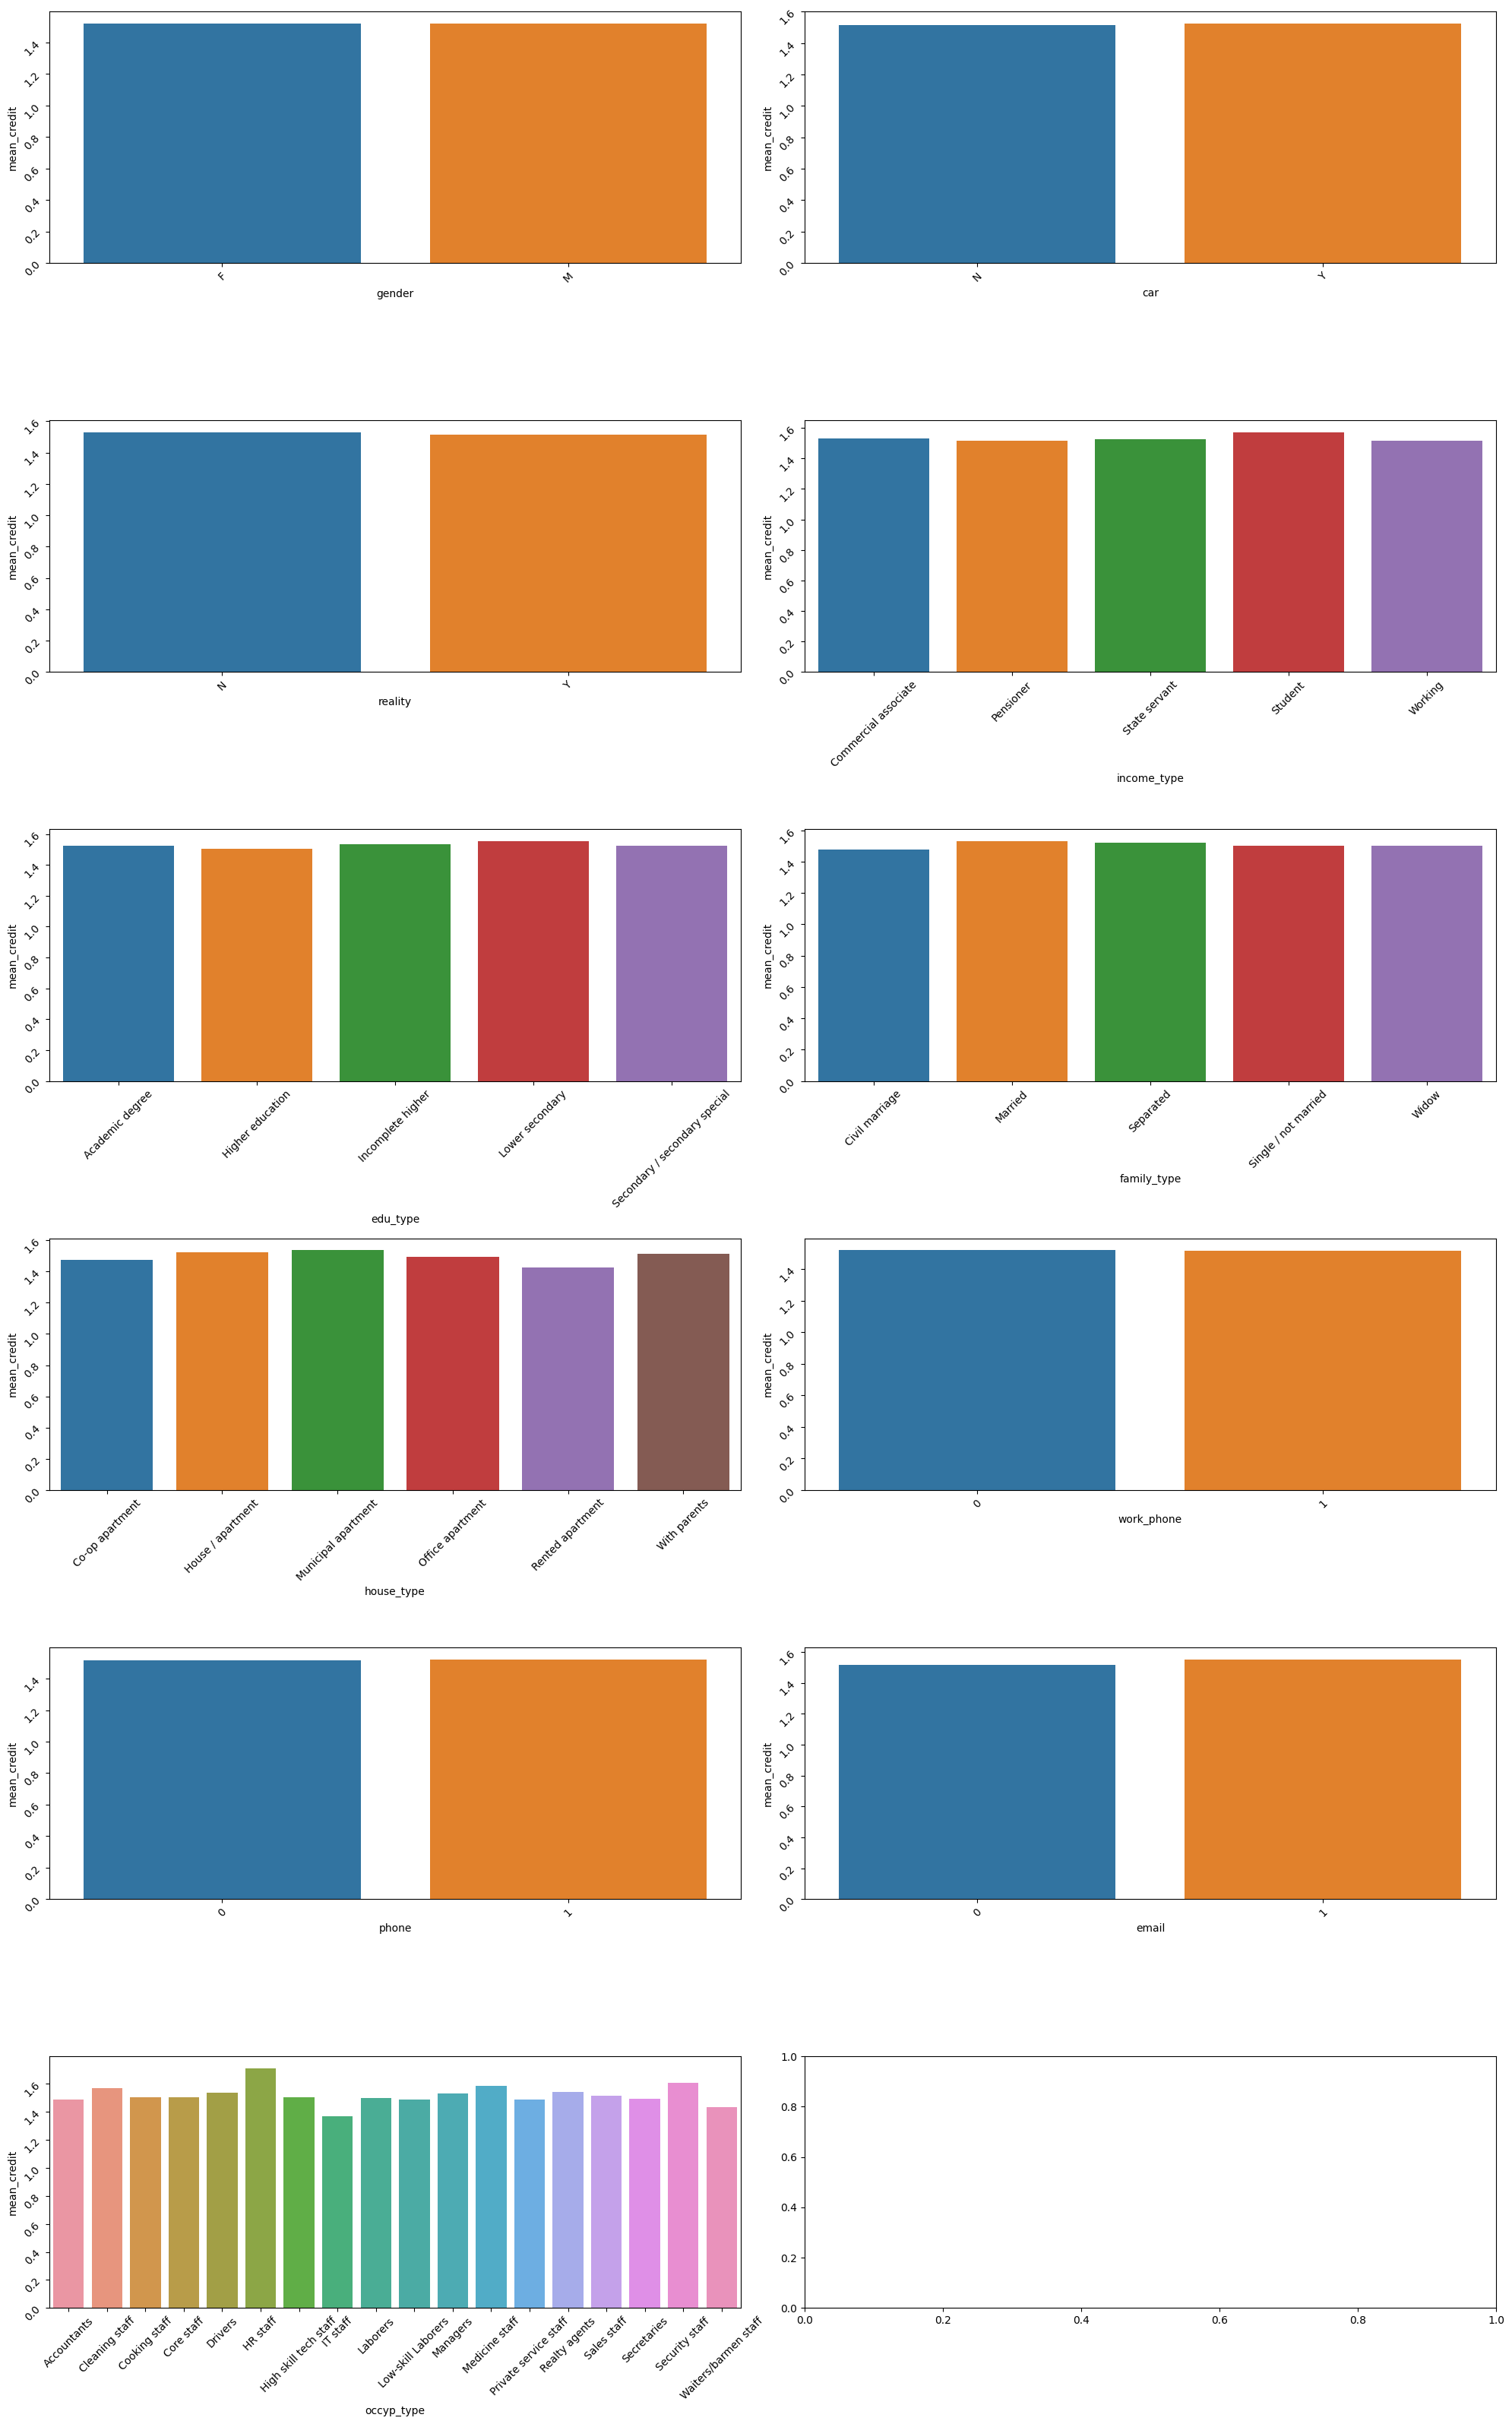

In [17]:
figsize = (20,32)
fig, axes = plt.subplots((len(categorical)+1)//2, 2, figsize=figsize)
for category in categorical :
    mean_credit = df.groupby(category)['credit'].mean().reset_index()
    mean_credit.rename(columns={'credit': 'mean_credit'}, inplace=True)

    ax = axes[categorical.index(category) // 2, (categorical.index(category) % 2)]
    sns.barplot(data = mean_credit, x = category, y = 'mean_credit', ax = ax)
    ax.tick_params(rotation = 45)

plt.tight_layout()
plt.show()

평균적으로 큰 특이한 지점은 없어보이나, occyp_type에서는 다른 변수에 비해 상대적으로 차이가 있음을 확인할 수 있습니다.

#### credit에 따른 수치형 변수의 value 분포

credit별로 numerical feature의 분포를 살펴보겠습니다.

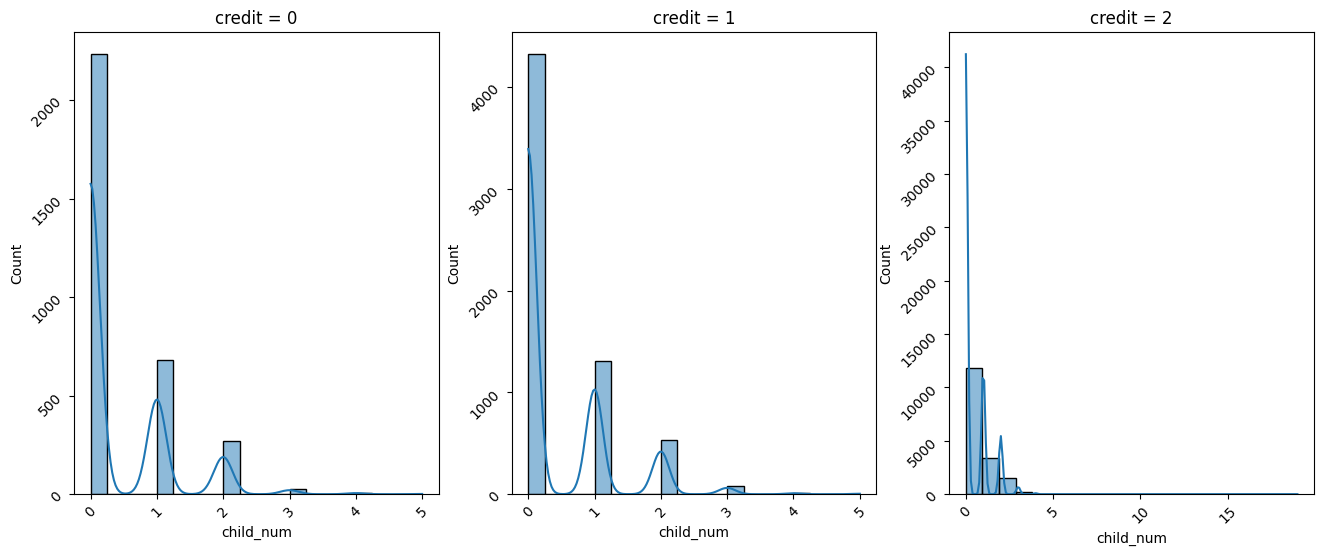

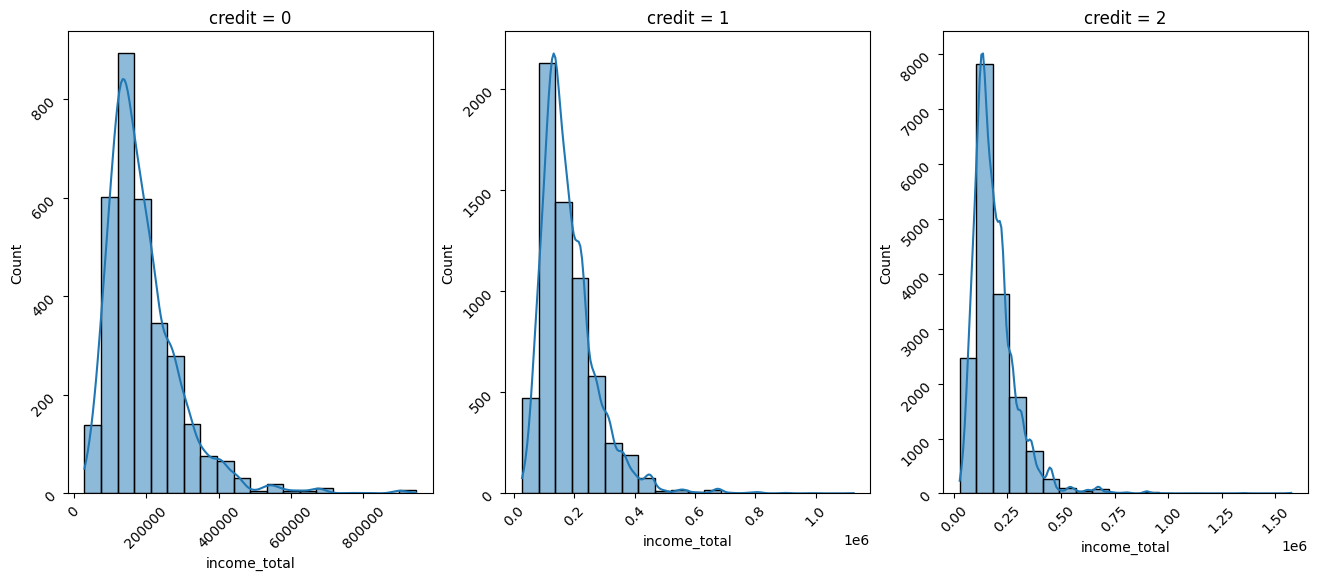

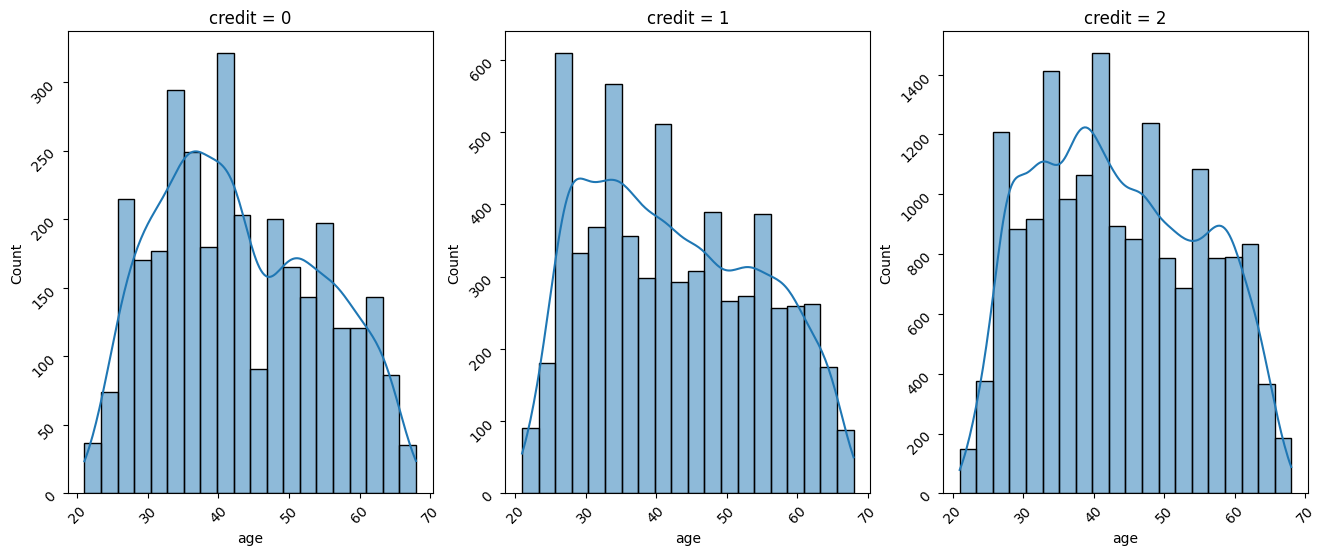

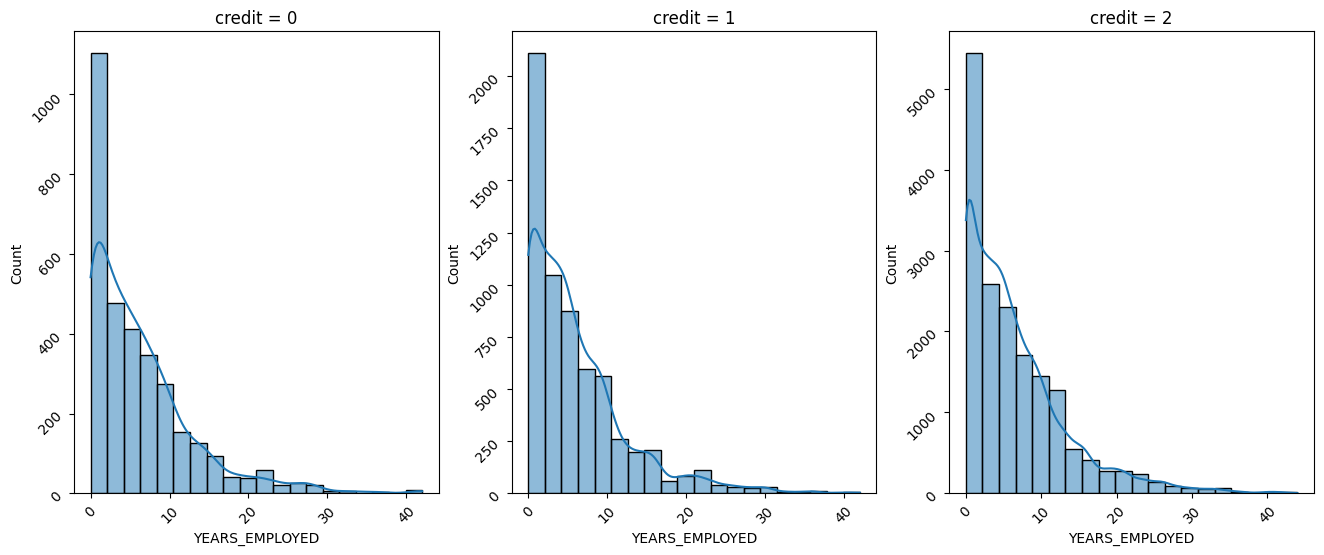

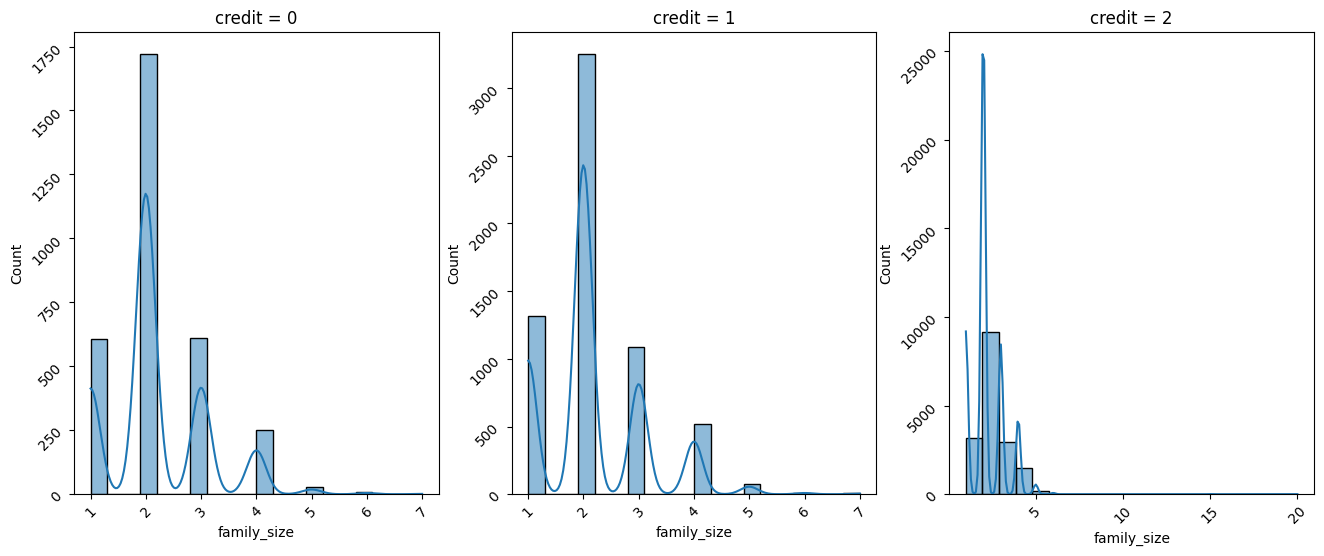

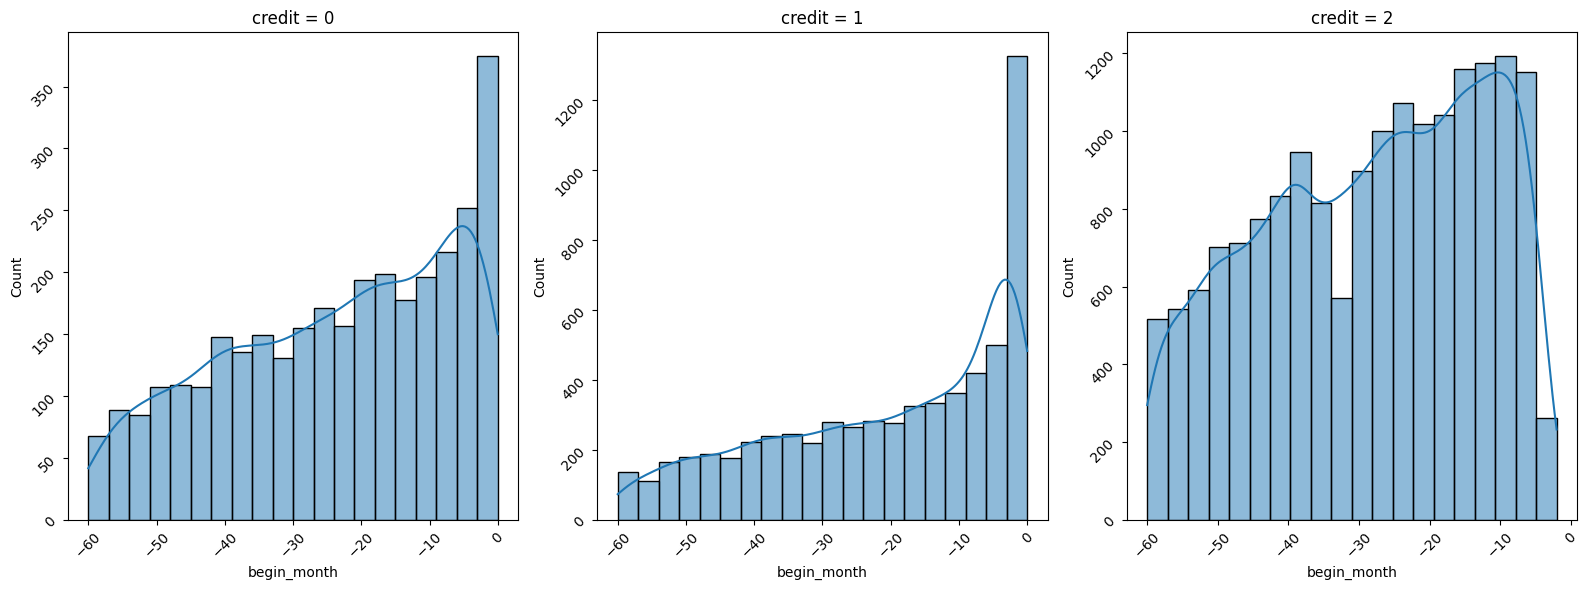

In [18]:
for column in numerical :
    f, ax = plt.subplots(1, 3, figsize=(16, 6))

    sns.histplot(x = column, kde = True, bins= 20, data = credit0, ax = ax[0])
    ax[0].set_title('credit = 0')
    ax[0].tick_params(rotation=45)

    sns.histplot(x = column, kde = True, bins= 20 ,data = credit1, ax = ax[1])
    ax[1].set_title('credit = 1')
    ax[1].tick_params(rotation=45)

    sns.histplot(x = column, kde = True, bins= 20 , data = credit2, ax = ax[2])
    ax[2].set_title('credit = 2')
    ax[2].tick_params(rotation=45)

plt.tight_layout()
plt.show()

- 대체로 큰 차이를 보이지 않습니다.
- 신용도가 높은 그룹은 신용도가 낮은 그룹에 비해서 30대 중후반~ 40대 초반의 이용자의 비율이 높습니다.
- 신용도가 낮은 그룹에서는 begin_month가 매우 짧은 이용자의 수가 확연히 적습니다.

### 상관계수 확인

dtype이 object가 아닌 feature들의 상관계수를 heatmap으로 확인해보겠습니다.

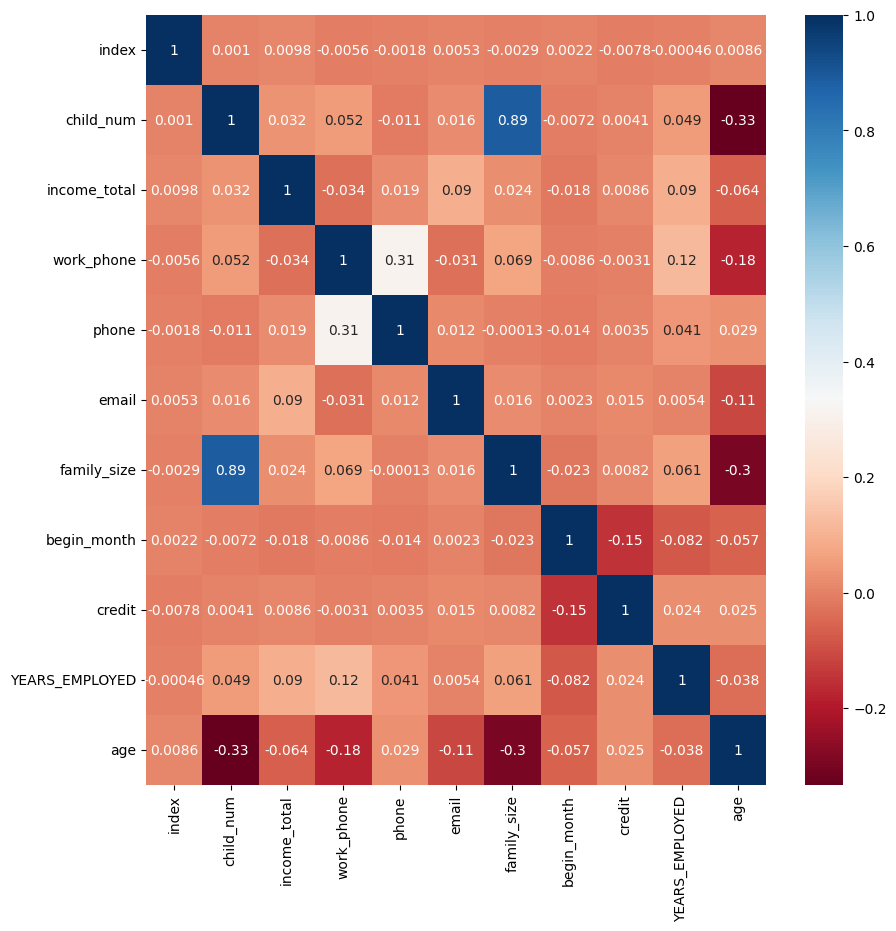

In [19]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 10))
sns.heatmap(corr, cmap ='RdBu', annot= True)
plt.show()

- family_size와 child_num이 매우 강한 상관관계가 있습니다.
- age는 child_num, family_size와 강한 상관관계가 있으며 work_phone과 약한 상관관계가 있습니다.
- phone과 workphone은 강한 상관관계가 있습니다.
- YEARS_EMPLOYED는 work_phone과 약한 상관관계가 있습니다.
- begin_month는 credit과 약한 상관관계가 있습니다.

## 결측치 처리를 위한 EDA

앞서 다양한 관점에서 데이터를 살펴봤는데, 이번에는 'occyp_type'의 결측치 처리를 위한 인사이트를 찾아보겠습니다.
<br>
### 'occyp_type'의 값별 분포

In [20]:
df['occyp_type'].unique()

array([nan, 'Laborers', 'Managers', 'Sales staff',
       'High skill tech staff', 'Core staff', 'Drivers', 'Medicine staff',
       'Accountants', 'Realty agents', 'Security staff', 'Cleaning staff',
       'Private service staff', 'Cooking staff', 'Secretaries',
       'HR staff', 'IT staff', 'Low-skill Laborers',
       'Waiters/barmen staff'], dtype=object)

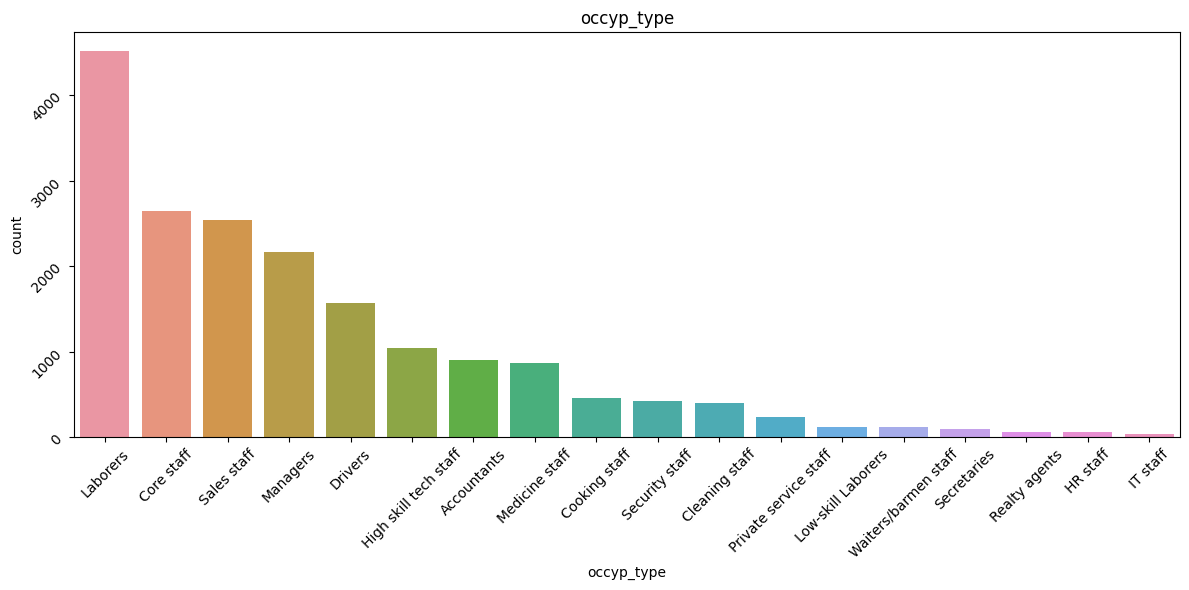

In [21]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x = 'occyp_type', data = df, ax = ax, order = df['occyp_type'].value_counts().index)
ax.set_title('occyp_type')
ax.tick_params(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
df['occyp_type'].value_counts() / df['occyp_type'].count()

Laborers                0.25
Core staff              0.14
Sales staff             0.14
Managers                0.12
Drivers                 0.09
High skill tech staff   0.06
Accountants             0.05
Medicine staff          0.05
Cooking staff           0.02
Security staff          0.02
Cleaning staff          0.02
Private service staff   0.01
Low-skill Laborers      0.01
Waiters/barmen staff    0.01
Secretaries             0.01
Realty agents           0.00
HR staff                0.00
IT staff                0.00
Name: occyp_type, dtype: float64

Laborers가 최빈값으로, 전체 분포에서 약 25%를 차지합니다.

### income_type과 비교 탐색

occyp_type과 관련이 있을 것으로 보이는 income_type을 탐색해보겠습니다.

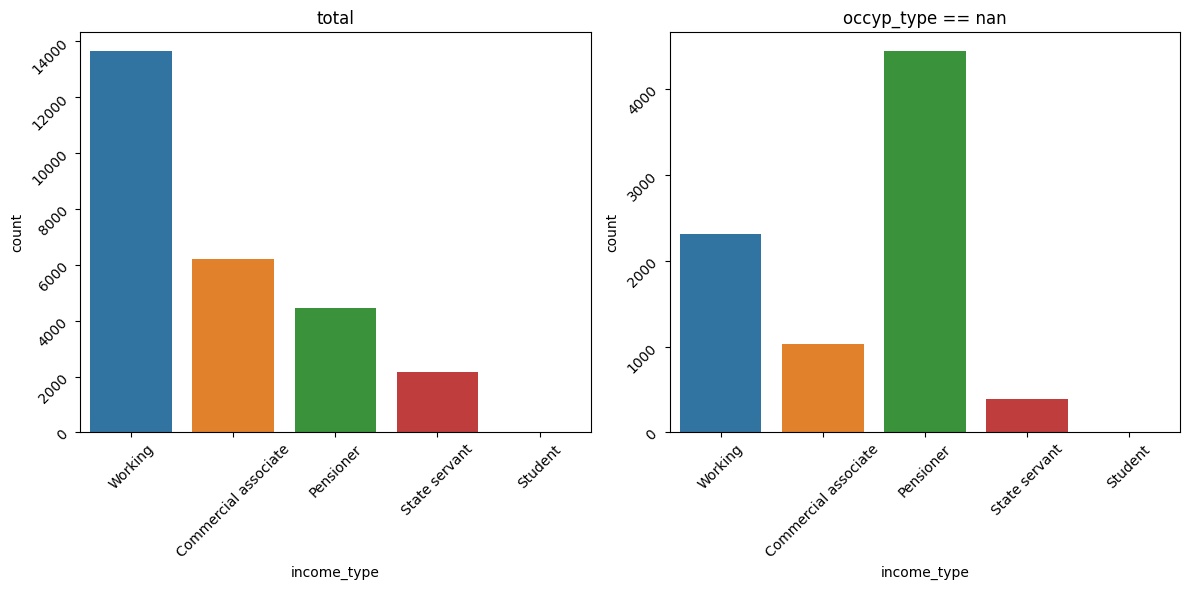

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x = 'income_type', data = df, ax = axes[0], order = df['income_type'].value_counts().index)
axes[0].set_title('total')
axes[0].tick_params(rotation = 45)

sns.countplot(x = 'income_type', data = df[df['occyp_type'].isnull()], ax = axes[1], order = df['income_type'].value_counts().index)
axes[1].set_title('occyp_type == nan')
axes[1].tick_params(rotation = 45)

plt.tight_layout()
plt.show()

모든 이용자 그룹에 비해, occyp_type이 nan인 그룹의 Pensioner(연금소득자)의 비율이 월등히 높습니다.

이번에는 역으로 income_type이 Pensioner인 그룹의 occyp_type을 살펴보겠습니다.

In [24]:
df[df['income_type'] == 'Pensioner']['occyp_type'].value_counts(dropna = False)

NaN               4440
Laborers             3
Core staff           2
Medicine staff       1
Drivers              1
Accountants          1
Managers             1
Name: occyp_type, dtype: int64

In [25]:
df[df['income_type'] == 'Pensioner'].dropna()

index gender car reality  child_num  income_total income_type  \
1964    1964      F   N       Y          0     157500.00   Pensioner   
5786    5786      M   N       N          0     247500.00   Pensioner   
6695    6695      F   N       Y          2     270000.00   Pensioner   
9793    9793      F   N       N          0     180000.00   Pensioner   
10357  10357      M   Y       Y          1     157500.00   Pensioner   
14356  14356      M   Y       N          0     292500.00   Pensioner   
17278  17278      F   N       Y          3     292500.00   Pensioner   
23227  23227      F   Y       Y          0     270000.00   Pensioner   
26159  26159      F   Y       N          0     450000.00   Pensioner   

                            edu_type           family_type  \
1964                Higher education               Married   
5786   Secondary / secondary special  Single / not married   
6695                Higher education  Single / not married   
9793   Secondary / secondary special        Civil marriage   
10357  Secondary / secondary special               Married   
14356               Higher education  Single / not married   
17278  Secondary / secondary special               Married   
23227               Higher education               Married   
26159               Higher education               Married   

                house_type  work_phone  phone  email      occyp_type  \
1964     House / apartment           0      1      1  Medicine staff   
5786     House / apartment           0      0      0        Laborers   
6695     House / apartment           0      0      0      Core staff   
9793   Municipal apartment           0      0      0        Laborers   
10357    House / apartment           1      0      0         Drivers   
14356    House / apartment           1      1      0        Laborers   
17278    House / apartment           0      0      0      Core staff   
23227    House / apartment           0      1      0     Accountants   
26159    House / apartment           1      1      0        Managers   

       family_size  begin_month  credit  YEARS_EMPLOYED  age  
1964          2.00       -32.00    2.00               4   33  
5786          1.00       -30.00    2.00               7   41  
6695          3.00       -36.00    2.00               8   28  
9793          2.00       -20.00    2.00               1   56  
10357         3.00       -19.00    2.00               2   30  
14356         1.00       -41.00    2.00              11   38  
17278         5.00       -21.00    2.00               2   33  
23227         2.00       -25.00    2.00               2   48  
26159         2.00       -46.00    2.00              16   54

Pensioner은 대부분 occyp_type이 nan입니다. nan이 아닌 그룹은 불과 9명으로,  모두 고용기간(YEARS_EMPLOYED)이 0보다 큰 값입니다.

### YEARS_EMPLOYED과 비교 탐색

위에서 YEARS_EMPLOYED와 occyp_type 사이에 관계가 있다는 단서를 얻었으니 이 둘을 비교해보겠습니다.

In [26]:
# 고용되지 않은 사람의 occyp_type
df[df['YEARS_EMPLOYED'] == 0]['occyp_type'].value_counts(dropna = False)

NaN    4438
Name: occyp_type, dtype: int64

In [27]:
# occyp_type이 nan인 사람의 고용 기간 (상위 5개)
df[df['occyp_type'].isnull()]['YEARS_EMPLOYED'].value_counts().head()

0    4438
2     401
1     343
7     320
5     309
Name: YEARS_EMPLOYED, dtype: int64

- 'occyp_type == NaN'은 'YEARS_EMPLOYED == 0'의 충분조건입니다. 즉, 고용되지 않은 사람은 반드시 occyp_type이 NaN이지만, occyp_type이 NaN이라고 해서 반드시 고용되지 않은 상태는 아닙니다.
- 따라서 occyp_type에 직업 가진 사람과 무직인 사람이 혼재되어 있음을 알 수 있습니다.

occyp_type에 따른 YEARS_EMPLOYED의 평균값은 어떨까요?

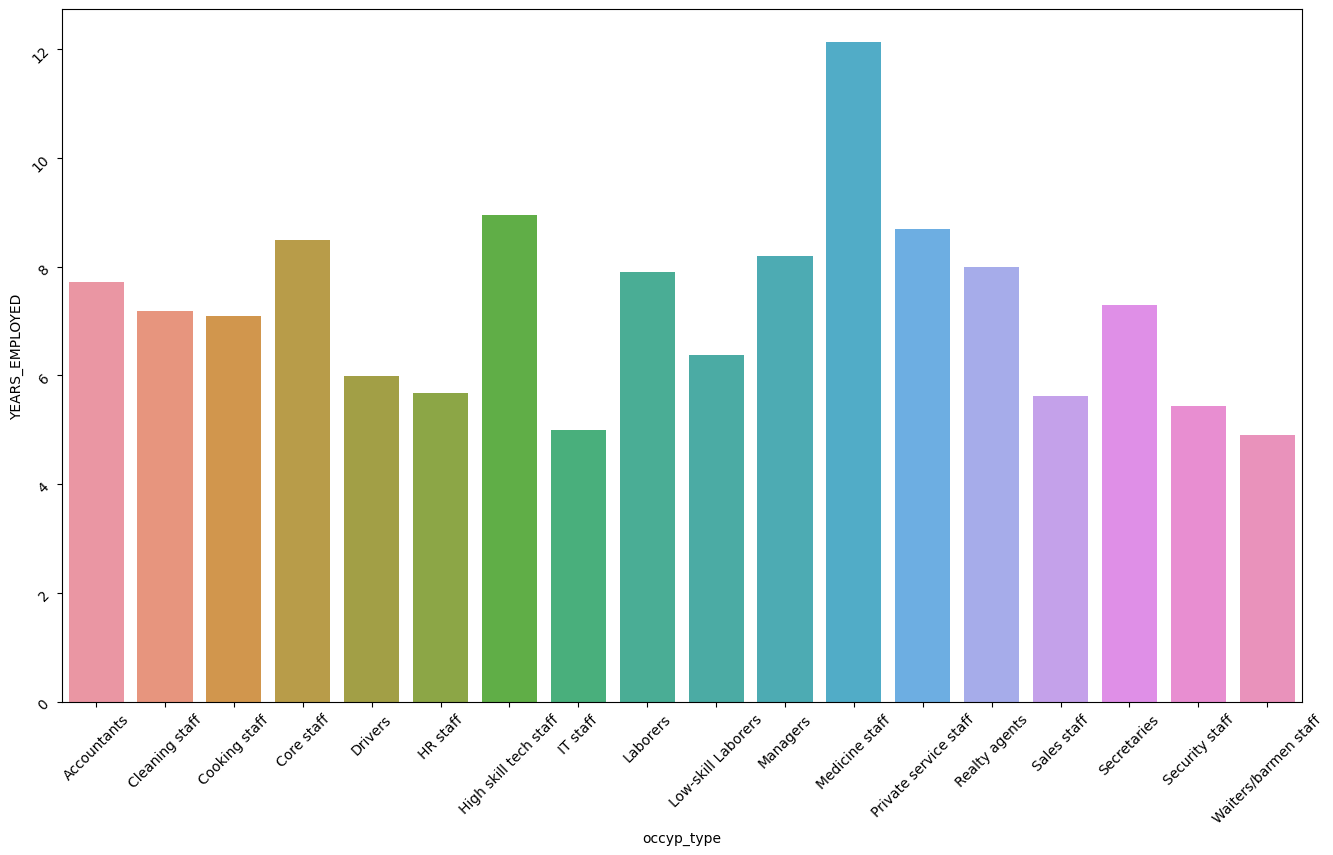

In [28]:
fig, ax = plt.subplots(figsize=(16,9))
sns.barplot (data = df.groupby('occyp_type')['YEARS_EMPLOYED'].mean().reset_index(), x = 'occyp_type', y = 'YEARS_EMPLOYED')
ax.tick_params(rotation = 45)

### income_total과 비교 탐색

소득별로 직업 분포를 보기 위해 income_total을 다섯 구간으로 나누었습니다.

In [29]:
def bin_income_total(income):
    bins = pd.qcut(income, q=5, labels=False)
    return bins
df['income_category'] = bin_income_total(df['income_total'])
df['income_category'].value_counts()

0    6191
3    5389
2    5294
4    4856
1    4727
Name: income_category, dtype: int64

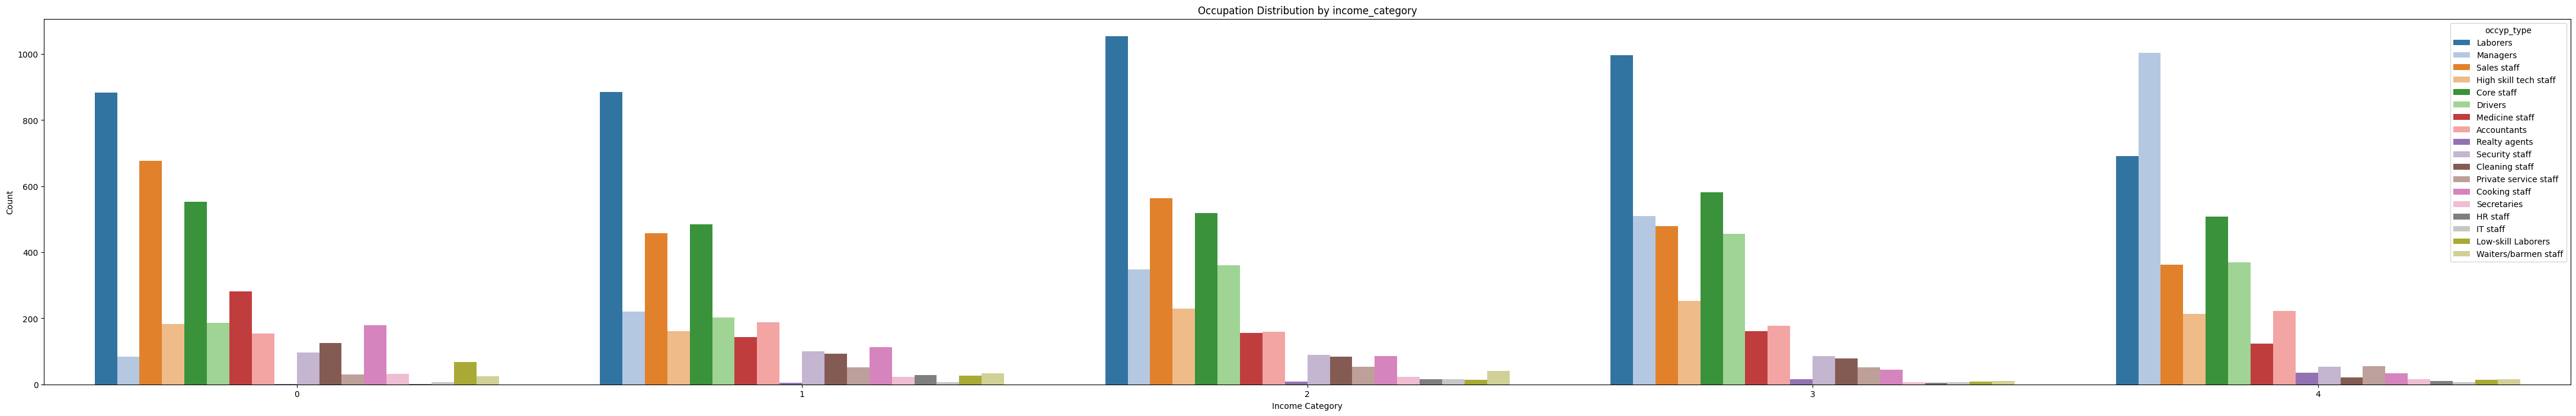

In [30]:
plt.figure(figsize=(55, 8))
sns.countplot(x='income_category', hue='occyp_type', data=df, palette='tab20')
plt.title('Occupation Distribution by income_category')
plt.xlabel('Income Category')
plt.ylabel('Count')

plt.legend(title='occyp_type', loc='upper right')
plt.show()

Laborers의 수는 원래 절대적으로 많았는데, 가장 고소득자인 구간의 그래프를 보면 managers가 Laborers보다도 많은 것을 확인할 수 있습니다. 이를 통해 occyp_type이 managers인 사람들의 소득이 굉장히 높음을 알 수 있습니다.

occyp_type별 income_total의 평균도 알아볼까요?

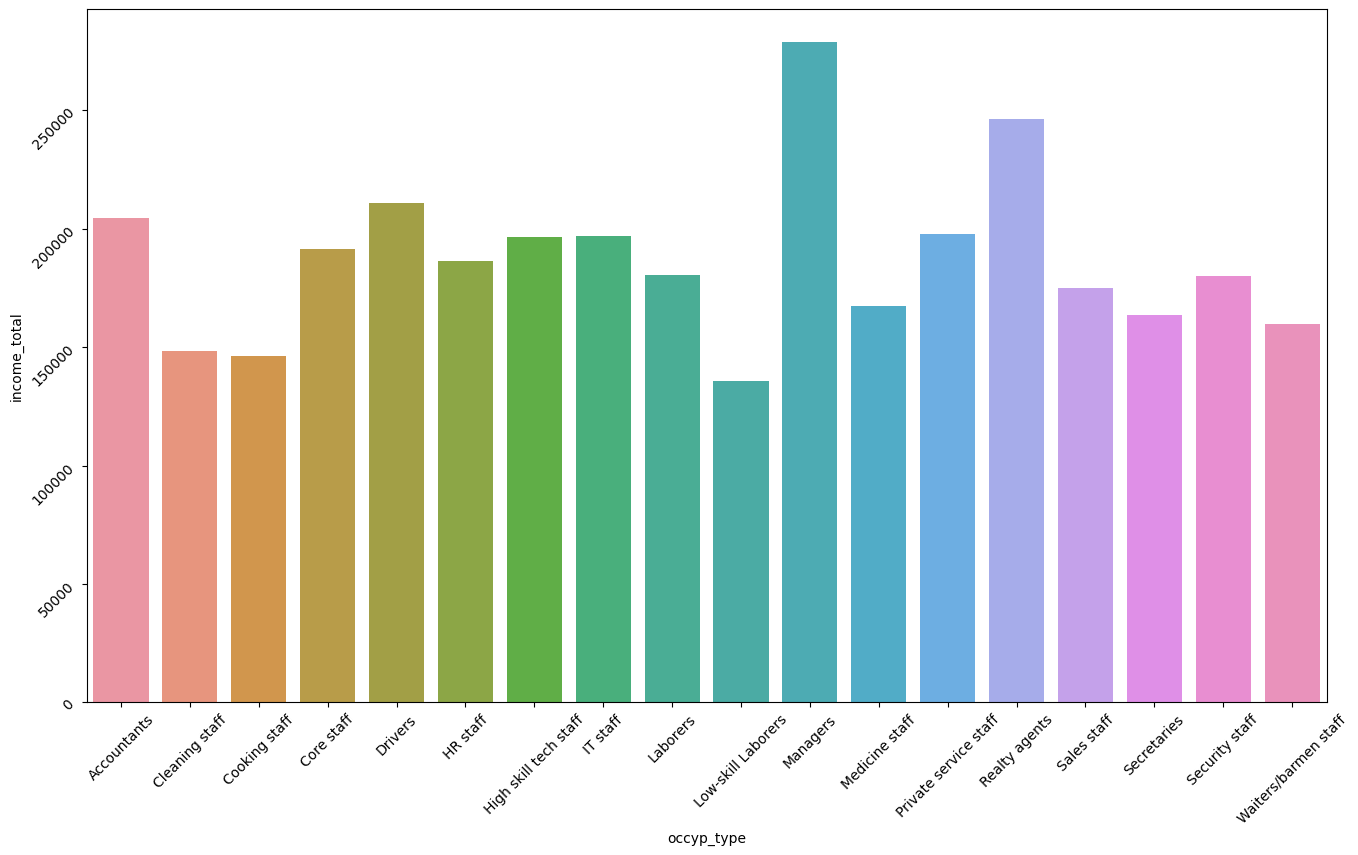

In [31]:
fig, ax = plt.subplots(figsize=(16,9))
sns.barplot ( data = df.groupby('occyp_type')['income_total'].mean().reset_index(), x = 'occyp_type', y = 'income_total')
ax.tick_params(rotation = 45)

역시 Managers의 income_total이 가장 많네요! 다음으로는 Realty agents가 그 뒤를 잇고 있고요.

income_total이 상위 10%인 사람의 occyp_type 분포도 시각화 해봅시다.

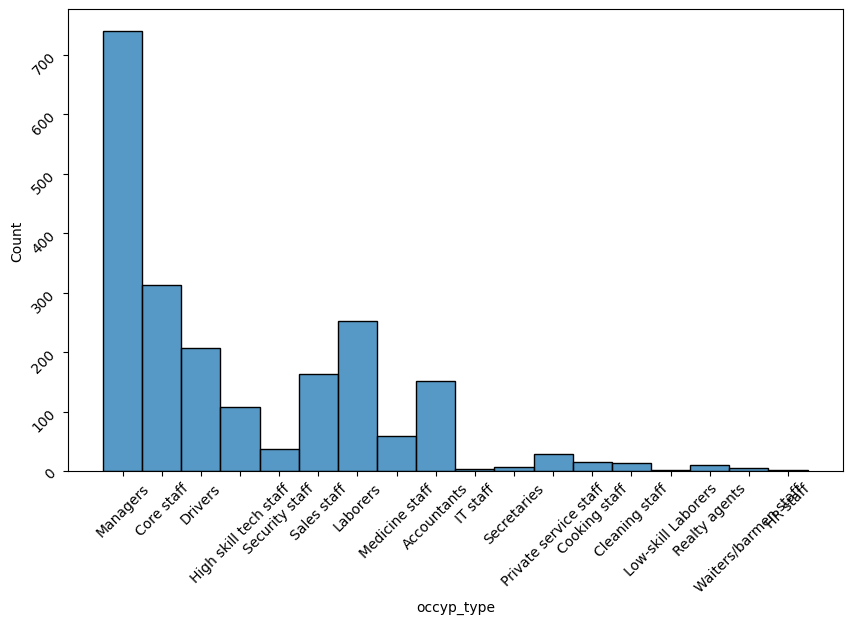

In [32]:
top_10 = df[df['income_total'] >=  df['income_total'].quantile(0.9) ]

fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data = top_10, x = 'occyp_type')
ax.tick_params(rotation = 45)

실제로 Managers의 income_total이 월등히 높으며, 소득 상위 10%에서 Managers의 비율이 높습니다.

## 기타 반영되지 못한 EDA

최종 모델에는 반영되지 않았지만, 인사이트를 얻기 위해 저희가 거친 시도를 남겨둡니다. 해당 내용을 건너뛰고 싶다면, [2부. Feature Selection / Feature Engineering](#2부.-feature-selection-/-feature-engineering) 으로 바로 넘어가주세요.

### family_type, family_size, child_num

In [33]:
df['family_size'].value_counts()

2.00     14106
1.00      5109
3.00      4632
4.00      2260
5.00       291
6.00        44
7.00         9
15.00        3
9.00         2
20.00        1
Name: family_size, dtype: int64

In [34]:
df['child_num'].value_counts()

0     18340
1      5386
2      2362
3       306
4        47
5        10
14        3
7         2
19        1
Name: child_num, dtype: int64

자녀 수가 19, 가족 수가 20인 데이터가 있다는 것이 눈길을 끕니다.

### family_type에 따른 데이터 비교

#### 시각화 함수 정의

In [35]:
# 시각화 함수 정의
def visual_corr(column, value1, value2) :
    corr1 = df[df[column] == value1].corr()
    corr2 = df[df[column] == value2].corr()

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.heatmap(corr1, cmap='coolwarm', center=0)
    plt.title(f"{value1}")

    plt.subplot(1, 2, 2)
    sns.heatmap(corr2, cmap='coolwarm', center=0)
    plt.title(f"{value2}")

    plt.tight_layout()
    plt.show()

def visual_count(column1, value1, value2, column2, data = df) :
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.countplot(x=column2, data=df[df[column1] == value1])
    plt.title(f"{value1}")
    plt.xlabel(f"{column2}")
    plt.ylabel("Count")

    plt.subplot(1, 2, 2)
    sns.countplot(x=column2, data=df[df[column1] == value2])
    plt.title(f"{value2}")
    plt.xlabel(f"{column2}")
    plt.ylabel("Count")

    plt.show()

#### Married vs Civil marriage

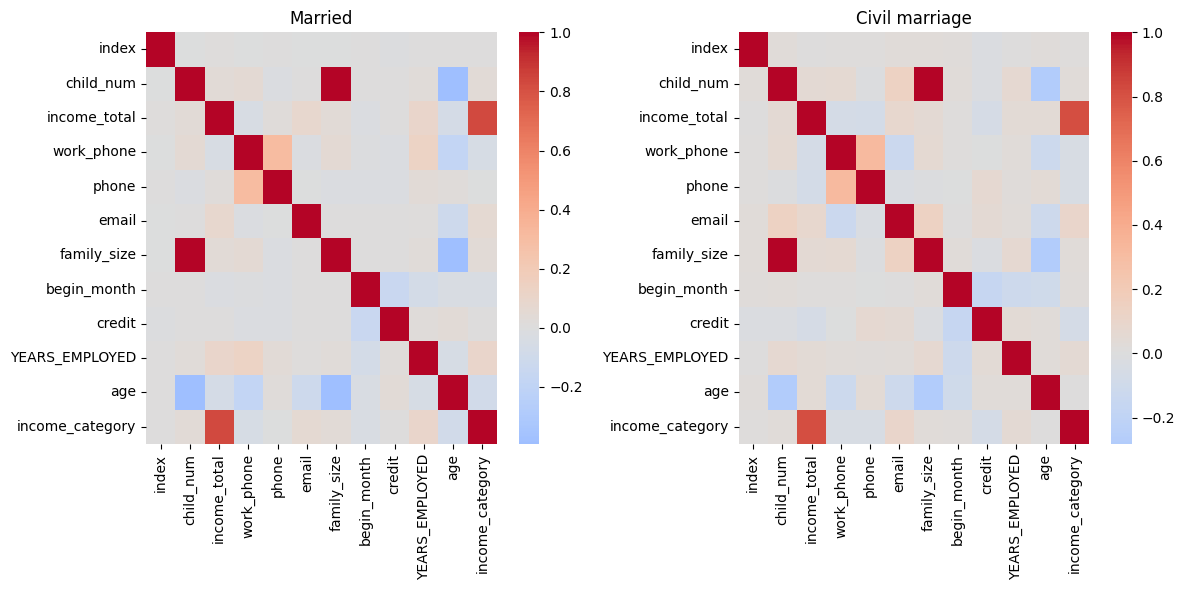

In [36]:
# 'family_type'이 'Married'인 경우와 'Civil marriage'인 경우의 상관관계 행렬 시각화(히트맵)
visual_corr('family_type', 'Married', 'Civil marriage')

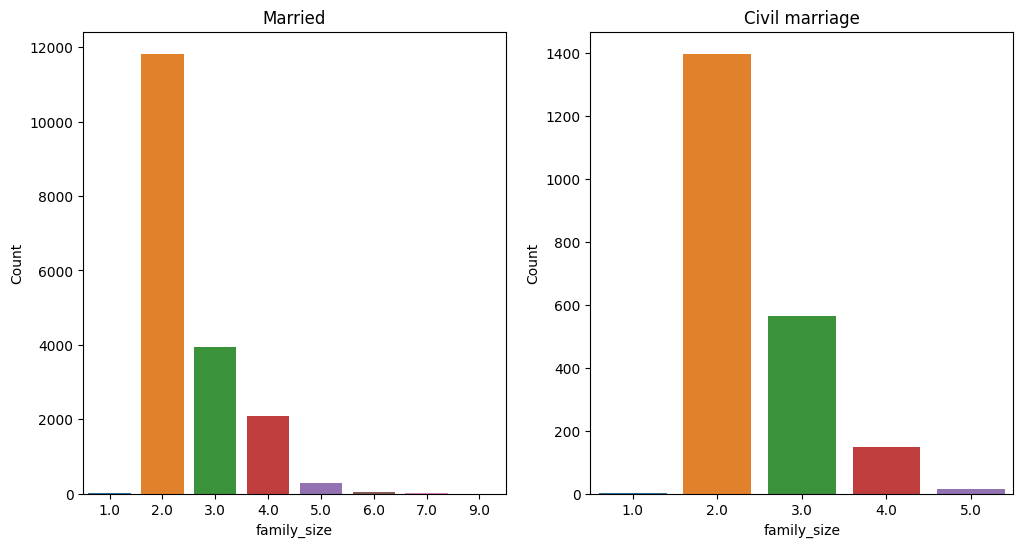

In [37]:
# 'family_type'이 'Married' 또는 'Civil marriage'인 사람들의 'family_size'
visual_count('family_type', 'Married', 'Civil marriage', 'family_size')

6인 이상의 가족은 'Married' 그룹에서는 나타나지만 'Civil marriage'에서는 나타나지 않습니다.

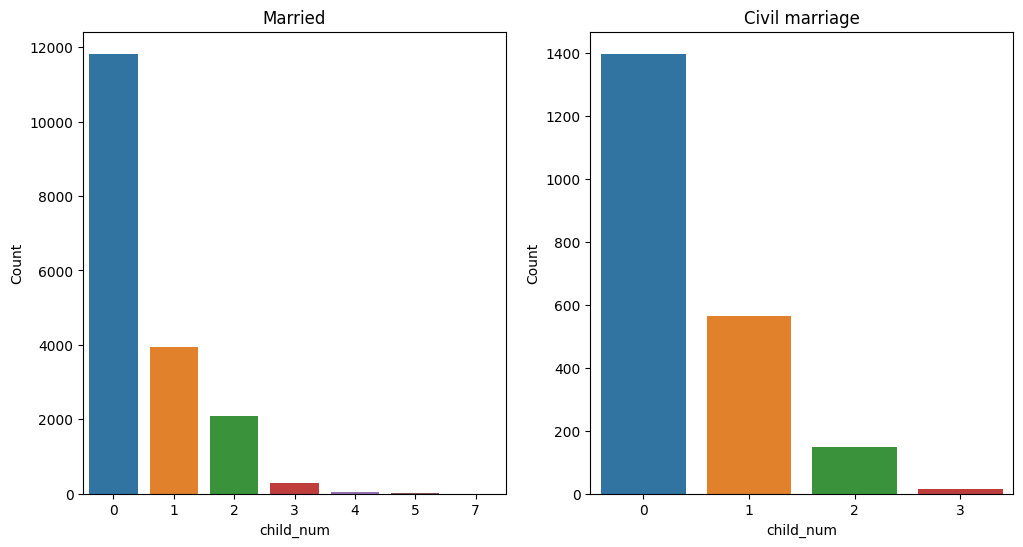

In [38]:
# 'family_type'이 'Married' 또는 'Civil marriage' 인 사람들의 'child_num'
visual_count('family_type', 'Married', 'Civil marriage', 'child_num')

child_num 또한 family_size와 비슷한 양상을 보입니다.

#### Married vs Single / not married
Married 그룹과 Single / not married 그룹을 비교하면 다음과 같습니다.

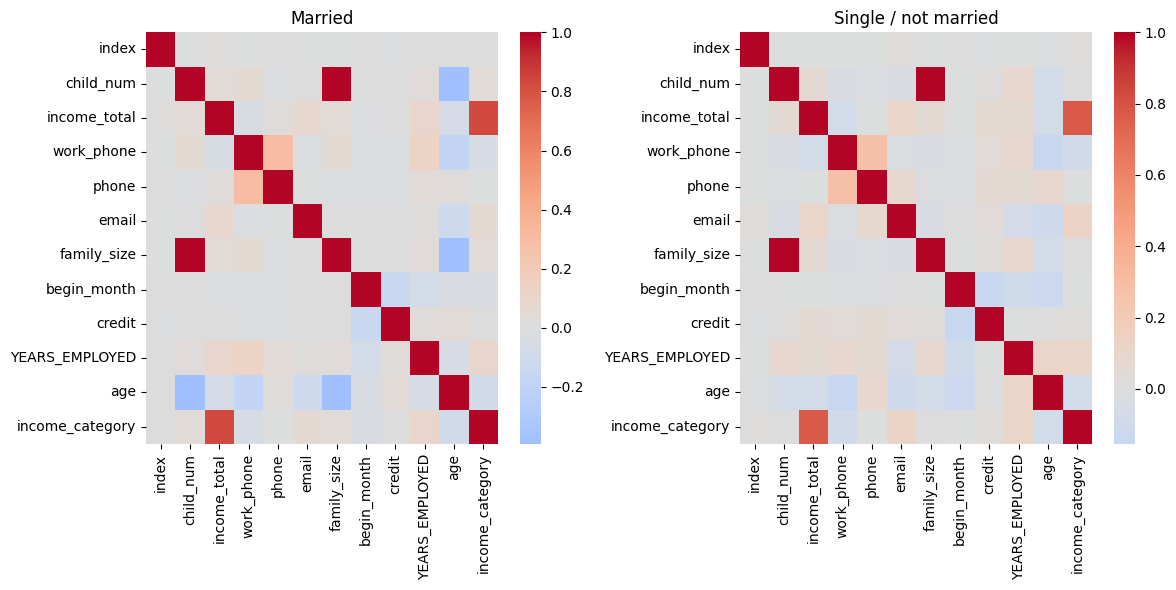

In [39]:
# 'family_type'이 'Married'인 경우와 'Single / not married'인 경우의 상관관계 행렬
visual_corr('family_type', 'Married', 'Single / not married')

Married 그룹이 Single / not married 그룹보다 나이와 더 강한 상관관계를 보입니다.

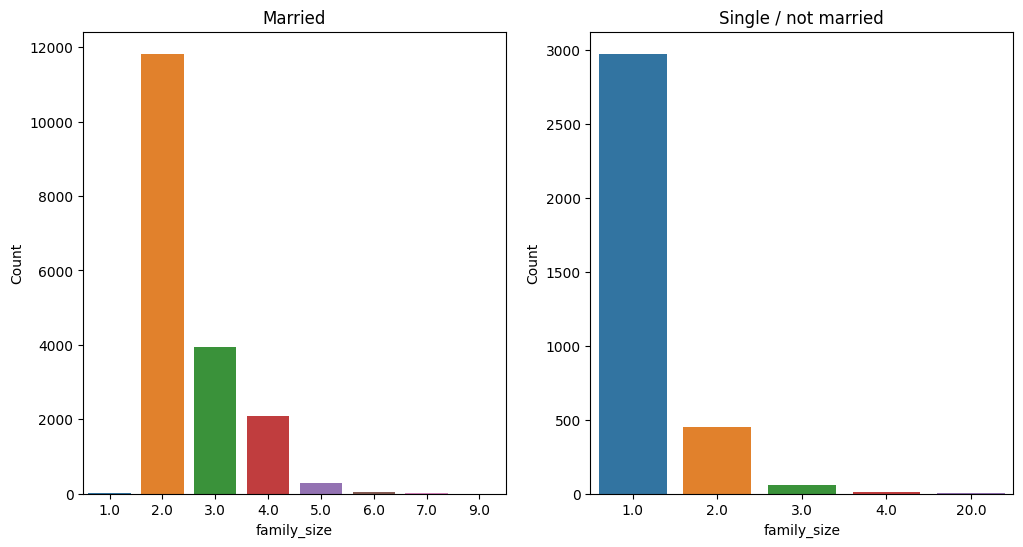

In [40]:
# 'family_type'이 'Married' 또는 'Single / not married'인 사람들의 'family_size'
visual_count('family_type', 'Married', 'Single / not married', 'family_size')

Married 인 그룹은 2인 가족이 압도적으로 많으나, Single / not Married 인 그룹은 1인 가족이 훨씬 많습니다. Single / not Married 그룹에서 family size가 20인 이용자가 눈에 띕니다.

#### Separted vs Widow

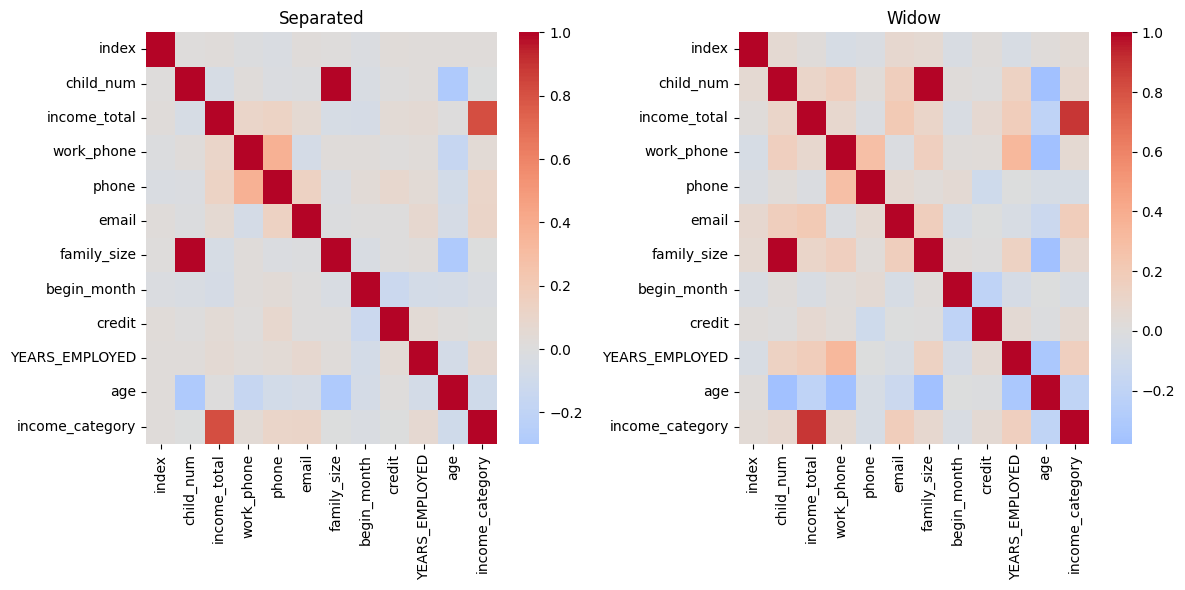

In [41]:
# 'family_type'이 'Separated' 또는 'Widow'인 경우의 상관관계 행렬
visual_corr('family_type', 'Separated', 'Widow')

Seperated와 Widow 사이에는 약간의 차이를 보입니다. Widow가 다른 feature와 상관관계가 조금 더 강합니다.

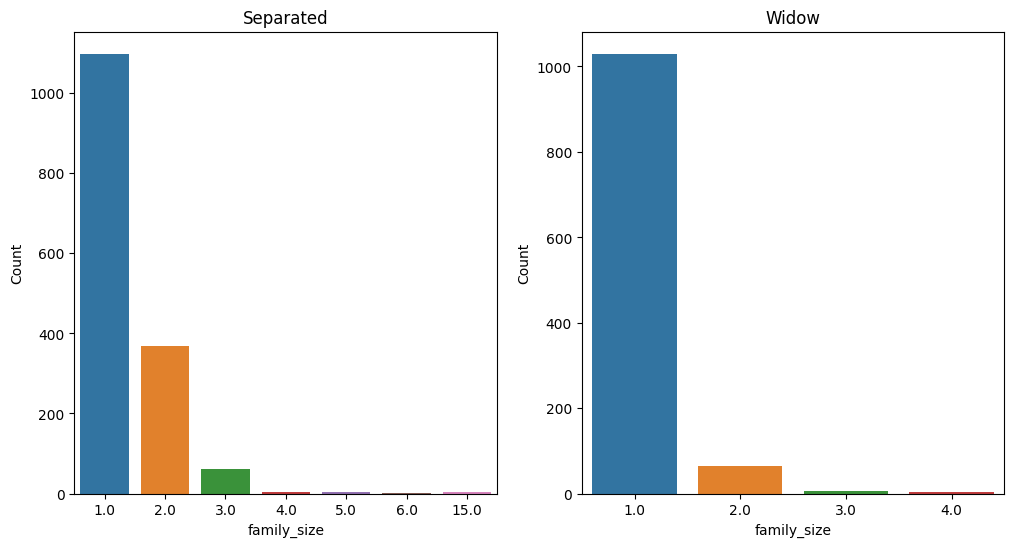

In [42]:
visual_count('family_type', 'Separated', 'Widow', 'family_size')

두 그룹 모두 1인 가정의 비율이 압도적으로 높으나, Separated 그룹은 2인 이상의 가정의 비율이 상대적으로 더 높으며 5인 이상의 큰 값도 극소수 가지고 있습니다.

# 2부. Feature Selection / Feature Engineering


 ### **Feature Selection이란?**
> EDA 혹은 모델 성능을 확인하는 과정에서 필요한 feature를 선별하는 절차를 뜻합니다.
    가령 모델 성능을 비교해보는 과정에서, 'A'라는 feature는 없을 때가 더 성능이 좋아서 빼기로 결정했다면, 이도 feature selection을 수행한 것이지요.

<br>

### **Feature Engineering이란?**
> 그러면 Feature Engineering은 무엇일까요? 간혹 결측치, 중복값, 이상치, 데이터 편향 등의 이유로 feature selection만으로는 적절한 모델 성능을 기대하기 어려울 때가 있습니다.
    이럴 때 feature를 조작하는 것을 feature engineering이라고 합니다.  결측치를 특정 값으로 채워줄 수도 있고, 결측치가 있는 행/열을 없애줄 수도 있죠.
    <br>
    앞서 EDA에서 특정 feature끼리 결합해서 새로운 feature를 만드는 것도 모두 이에 해당됩니다.
    <br>
    주어진 feature만으로는 성능이 더이상 오르지 않는다면, 새로운 파생변수를 만드는 것도 고려해보세요!


## 데이터 다시 불러오기

앞서 EDA에서의 코드 실행결과가 섞이지 않도록 다시 데이터를 불러옵니다.

In [2]:
df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

## 불필요한 feature 삭제

In [3]:
df = df.drop(['FLAG_MOBIL', 'index'], axis=1)
test_df = test_df.drop(['FLAG_MOBIL', 'index'], axis=1)

* 'FLAG_MOBIL' : 모든 데이터에서 1로 동일한 값을 가지기 때문에, 변수 간 관계 파악에 도움이 되지 않습니다.
* 'index' : 모든 데이터에서 서로 다른 값을 가지며, 특정 기준에 의한 값이 아닌 단순히 행 번호를  나타내므로, 마찬가지로 변수 간 관계 파악에 도움이 되지 않습니다.

## 결측치 처리: occyp_type

In [4]:
df['occyp_type'] = df['occyp_type'].fillna("Unknown")
test_df['occyp_type'] = test_df['occyp_type'].fillna("Unknown")

데이터의 수집 배경을 알 수 없어서, 가입 시 고객으로부터 입력받은 개인정보라고 가정하고 접근했습니다.
<br>
이 때 직업을 미기입한 경우 결측치로 나타난다고 유추할 수 있습니다.
<br>
<br>
결측치가 데이터 손실이 아닌 의도된 것이라면, 이를 'Unknown'으로 일괄적으로 채워서 하나의 카테고리로 인식하도록 합니다.

## 파생변수: ID

In [5]:
add_columns = ['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type',
       'house_type', 'occyp_type', 'work_phone', 'email', 'DAYS_BIRTH', 'child_num', 'DAYS_EMPLOYED']

df['ID'] = df[add_columns].astype(str).apply(lambda x: '_'.join(x), axis=1)
test_df['ID'] = test_df[add_columns].astype(str).apply(lambda x: '_'.join(x), axis=1)

drop한 'index', 'FLAG_MOBIL'을 제외하면, 'income_total', 'phone', 'family_size', 'begin_month', 'credit' 외의 모든 변수를 문자열로 더해주었습니다.
<br>
- 이 때 각각의 데이터(row)는 기본적으로는 고유한 값을 가지게 되며, 겹치는 ID값은 동일인물로 식별되도록 하였습니다.
- 가입 시기('begin_month')에 따라 수입 수준('income_total'), 가족구성원 수('family_size') 등의 정보는 변동될 수 있다고 가정했습니다.
- credit은 예측해야 하는 y값이기 때문에 제외되었습니다.

## 이상치 처리

### 'DAYS_EMPLOYED'

근무일수('DAYS_EMPLOYED')는 시작일을 기준으로 경과된 일자만큼의 음수값을 지닙니다.<br> 하지만 무직인 사람들은 양수값으로 되어 있는데, 이들은 이상치로 간주하여 모두 0으로 처리하겠습니다!

In [6]:
df['DAYS_EMPLOYED'] = df['DAYS_EMPLOYED'].apply(lambda x: 0 if x > 0 else x)
test_df['DAYS_EMPLOYED'] = test_df['DAYS_EMPLOYED'].apply(lambda x: 0 if x > 0 else x)

### 'child_num'

'child_num' 열에 대한 값의 수를 세고, 각 고유한 값의 데이터 내 비율을 계산해보겠습니다. <br>비율은 normalize=True 옵션을 통해 계산할 수 있어요!

In [7]:
df['child_num'].value_counts(normalize=True)

child_num
0     0.693200
1     0.203576
2     0.089277
3     0.011566
4     0.001776
5     0.000378
14    0.000113
7     0.000076
19    0.000038
Name: proportion, dtype: float64

In [8]:
df['child_num'] = df['child_num'].apply(lambda x: 3 if x >= 3 else x)
test_df['child_num'] = df['child_num'].apply(lambda x: 3 if x >= 3 else x)

- 'child_num' == 4인 구간부터는 데이터 내 점유율이 0.17% 이하 수준으로 급격히 떨어지는 것으로 보아 이를 이상치로 판단하고 모두 3으로 값을 조정해주었습니다.
- 다만, 동일한 유형의 이상치는 중요한 특징이 될 것으로 추정하여 파생변수 'ID' 생성 이후에 해당 feature에서 이상치 처리를 진행했습니다.


### 'family_size'

In [9]:
df['family_size'].value_counts(normalize=True)

family_size
2.0     0.533167
1.0     0.193106
3.0     0.175077
4.0     0.085422
5.0     0.010999
6.0     0.001663
7.0     0.000340
15.0    0.000113
9.0     0.000076
20.0    0.000038
Name: proportion, dtype: float64

In [10]:
df['family_size'] = df['family_size'].apply(lambda x: 7 if x >= 7 else x)
test_df['family_size'] = df['family_size'].apply(lambda x: 7 if x >= 7 else x)

위의 'child_num'의 이상치 처리와 마찬가지로, 7 이상인 값들의 수는 전체의 0.1%가 채 되지 않기 때문에 이상치로 판단하고 7로 값을 조정했습니다.

## feature 핸들링: 음수 -> 절대값

전반적으로 음수인 값만 있는 열에는 절대값을 취했을 때 성능이 더 좋았기에, 이를 적용했습니다.

In [11]:
features = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']
for f in features:
    df[f] = df[f].abs()
    test_df[f] = test_df[f].abs()

## 파생변수 생성

### no_work

위에서 ID열을 만들었던 것처럼, 데이터에 대한 논리적인 접근을 통해 새로운 파생변수들을을 생성해 보려고 합니다.
<br>
출생 이후부터 취업 전까지를 일하지 않은 날로 간주하여 'DAYS_BIRTH'에서 'DAYS_EMPLOYED'를 빼주었습니다.

In [12]:
df["No_work"] = df["DAYS_BIRTH"] - df['DAYS_EMPLOYED']
test_df["No_work"] = test_df["DAYS_BIRTH"] - test_df['DAYS_EMPLOYED']

### 연, 월, 주: 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'No_work'

'DAYS_BIRTH', 'DAYS_EMPLOYED', 'No_work'의 경우 각각의 값을 일 단위 날짜로 표기하고, <br>모델 성능 개선을 위해 각각 연, 월, 주 정보를 담은 파생변수를 생성하겠습니다.

In [13]:
def get_DAY_MONTH_WEEK(df, feature):
    df[f'{feature}(year)'] = df[feature] // 365 # 연 정보
    df[f'{feature}(month)'] = (df[feature] % 365) // 30 # 월 정보
    df[f'{feature}(week)'] = ((df[feature] % 365) % 30) // 7 # 일 정보

    return df

In [14]:
# train data
df = get_DAY_MONTH_WEEK(df, 'DAYS_BIRTH')
df = get_DAY_MONTH_WEEK(df, 'DAYS_EMPLOYED')
df = get_DAY_MONTH_WEEK(df, 'No_work')

# test data도 똑같이 적용해줍니다.
test_df = get_DAY_MONTH_WEEK(test_df, 'DAYS_BIRTH')
test_df = get_DAY_MONTH_WEEK(test_df, 'DAYS_EMPLOYED')
test_df = get_DAY_MONTH_WEEK(test_df, 'No_work')

변수 생성이 잘 되었는지 확인해볼까요?

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   gender                26457 non-null  object 
 1   car                   26457 non-null  object 
 2   reality               26457 non-null  object 
 3   child_num             26457 non-null  int64  
 4   income_total          26457 non-null  float64
 5   income_type           26457 non-null  object 
 6   edu_type              26457 non-null  object 
 7   family_type           26457 non-null  object 
 8   house_type            26457 non-null  object 
 9   DAYS_BIRTH            26457 non-null  int64  
 10  DAYS_EMPLOYED         26457 non-null  int64  
 11  work_phone            26457 non-null  int64  
 12  phone                 26457 non-null  int64  
 13  email                 26457 non-null  int64  
 14  occyp_type            26457 non-null  object 
 15  family_size        

In [16]:
df.head(5)

gender car reality  child_num  income_total           income_type  \
0      F   N       N          0      202500.0  Commercial associate   
1      F   N       Y          1      247500.0  Commercial associate   
2      M   Y       Y          0      450000.0               Working   
3      F   N       Y          0      202500.0  Commercial associate   
4      F   Y       Y          0      157500.0         State servant   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   
2               Higher education         Married    House / apartment   
3  Secondary / secondary special         Married    House / apartment   
4               Higher education         Married    House / apartment   

   DAYS_BIRTH  ...  No_work  DAYS_BIRTH(year)  DAYS_BIRTH(month)  \
0       13899  ...     9190                38                  0   
1       11380  ...     9840                31                  2   
2       19087  ...    14653                52                  3   
3       15088  ...    12996                41                  4   
4       15037  ...    12932                41                  2   

   DAYS_BIRTH(week) DAYS_EMPLOYED(year)  DAYS_EMPLOYED(month)  \
0                 4                  12                    10   
1                 0                   4                     2   
2                 2                  12                     1   
3                 0                   5                     8   
4                 1                   5                     9   

   DAYS_EMPLOYED(week)  No_work(year) No_work(month)  No_work(week)  
0                    4             25              2              0  
1                    2             26             11              2  
2                    3             40              1              3  
3                    3             35              7              1  
4                    1             35              5              1  

[5 rows x 29 columns]

### 'income_year'

기존의 'income_total'을 당사자의 총소득으로 가정했을 때, 연소득(연봉) 정보가 없습니다.
<br>
따라서 앞서 구한 근속년수('DAYS_EMPLOYED(year)')로 해당 값을 나눠주되, 0으로 나눌 시 무한으로 발산하므로 아주 작은 값을 더해주었습니다.

In [17]:
df['income_year'] = df['income_total'] / (df['DAYS_EMPLOYED(year)'] + 1e-4)
test_df['income_year'] = test_df['income_total'] / (test_df['DAYS_EMPLOYED(year)'] + 1e-4)

### 'income'

나이가 많으면서 근무일수도 높다면, 소득수준이 더 높을 것이라고 가정하여 접근했습니다.
<br>
총소득('income_total')을 살아온 일수('DAYS_BIRTH') + 근무일수('DAYS_EMPLOYED')로 나눠주겠습니다.

In [18]:
df['income'] = df['income_total'] / ((df['DAYS_BIRTH'] + df['DAYS_EMPLOYED']))
test_df['income'] = test_df['income_total'] / ((test_df['DAYS_BIRTH'] + test_df['DAYS_EMPLOYED']))

### 'income_family'

가족구성원이 많다면 실질적인 체감소득이 적을 것이라고 가정했습니다.
<br>
소득은 동일하되 가족구성원 수가 더 많은 경우, 체감소득은 낮아질 것이기 때문에 총소득('income_total')을 가족구성원 수('family_size')로 나눠 주었습니다.

In [19]:
df['income_famliy'] = df['income_total'] / df['family_size']
test_df['income_famliy'] = test_df['income_total'] / test_df['family_size']

### car + email

'car', 'email' 자체로는 모델 성능에 큰 영향을 끼치지 못했으나, 둘을 더한 파생변수를 사용했을 때는 성능 개선 효과가 있었습니다.

In [20]:
df['car'] = df['car'].apply(lambda x: 1 if x == 'Y' else 0)
test_df['car'] = test_df['car'].apply(lambda x: 1 if x =='Y' else 0)

df['car_email'] = df['car'] + df['email']
test_df['car_email'] = test_df['car'] + test_df['email']

### 정리: 불필요 변수 삭제

In [21]:
drop_list = ['DAYS_EMPLOYED','DAYS_BIRTH','income_total', 'No_work', 'car', 'email']
df = df.drop(drop_list, axis=1)
test_df = test_df.drop(drop_list, axis=1)

feature와 y의 패턴 및 선형관계는 모델로 하여금 더 강건한 예측을 할 수 있게 돕지만, feature와 feature 간의 지나치게 짙은 패턴은 오히려 성능을 저해시키는 요소가 되곤 합니다!
<br>
이를 **다중공선성**이라고 하는데, feature들끼리의 연관성이 높아지면 모델이 학습하면서 해당 feature에 이목이 쏠려 다른 중요한 feature를 놓치게 될 수 있죠.
<br>
따라서 feature selection 시 비록 원래부터 존재했던 feature일지라도 성격이 유사한 경우 하나만 가져가는 것을 고려해볼 수도 있습니다.
<br>
여기서는 파생변수를 만들면서 사용되었던 feature들을 삭제합니다.

# 3부. 전처리

## 타입캐스팅: 'credit'

원래 'credit'은 0.0, 1.0, 2.0으로 float였기 때문에, int로 형변환을 시행해주었습니다.

In [22]:
df['credit'] = df['credit'].astype(int)

## X_data, y_data 분리

In [23]:
X_data = df.drop('credit', axis=1)
y_data = df['credit']

## Custom Encoding: edu_type

edu_type은 최종학력으로 추정됨에 따라 카테고리 간 대소관계가 있다고 판단하여, 별도의 Encoding을 진행했습니다.

In [24]:
edu_type = {
    'Lower secondary' : 1, # 중등과정 이하
    'Secondary / secondary special' : 2, # 중등과정
    'Incomplete higher' : 3, # 고등과정 중퇴
    'Higher education' : 4, # 고등과정
    'Academic degree' : 5 # 학사학위
}

In [25]:
X_data['edu_type'] = X_data['edu_type'].apply(lambda x: edu_type[x])
test_df['edu_type'] = test_df['edu_type'].apply(lambda x: edu_type[x])

## Scaling & Encoding

## StandardScaler

- 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업을 **Feature Scaling** 이라고 합니다. 대표적인 방법으로 **표준화(Standardization)**와 **정규화(Normaliaztion)**가 있습니다. 세상의 많은 불규칙한 물리 현상이 가우시안 분포(평균 0, 분산 1)를 따르고 있는데, **표준화는 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 분포**를 가진 값으로 변환하는 것을 말합니다. (흔히 정규분포를 가우시안 분포라고도 합니다.) <br>이러한 표준화를 사용한다면 다른 데이터와 비교를 원활하게 하고 Overflow나 Underflow를 방지하며 최적화 과정에서 안정성과 수렴 속도를 향상시켜줄 수 있습니다!

- 특히 서포트 벡터 머신(Support Vector Machine)이나 선형 회귀(Linear Regression), 로지스틱 회귀(Logistic Regression)는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현되었기기 때문에, 사전에 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소가 됩니다.

- 저희는 각 데이터의 분포를 표준화하는 방법 중 **StandardScaler**를 사용해주었습니다. StandardScaler의 식은 다음과 같습니다.

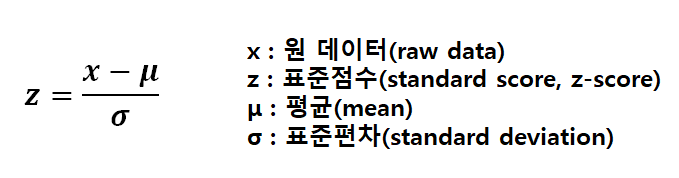

    출처: https://velog.io/@kdhangelic/scikit-learn-%EC%A0%95%EB%A6%AC

예시) 평균과 표준편차가 다른 데이터를 StandardScaler 한 그래프는 다음과 같습니다.

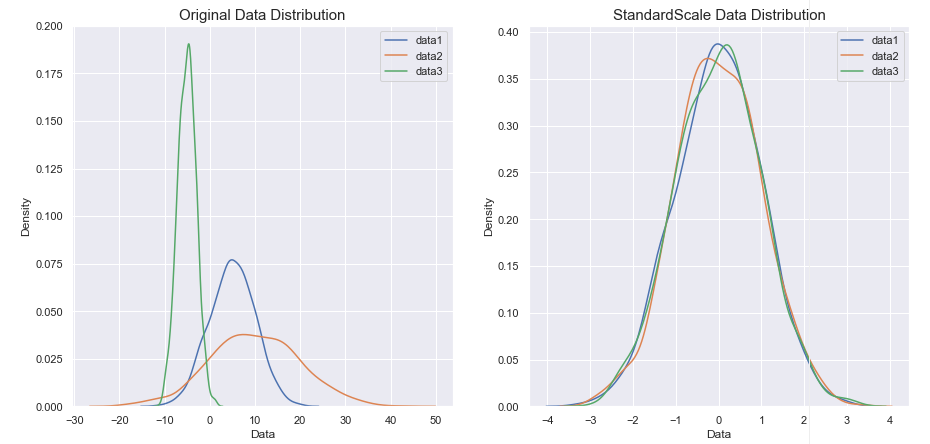

    출처: https://jasmine46.tistory.com/74

sklearn.preprocessing.StandardScaler에 대한 파라미터 등 보다 자세한 내용은  [사이킷런 - StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) 를 참고해 주세요!

## OrdinalEncoder

- **OrdinalEncoding**이란 Categorical feature(범주형 특성)에 대한 순서형 인코딩이라고 하며, 문자형 데이터를 숫자형 데이터로 변환해주는 방법입니다.<br>
변수의 순서를 유지하는 encoding 방식으로 순서형 변수에 대해 사용되는데, 범주형 feature가 너무 많아 one hot encoding하기가 애매한 경우 사용하기 좋은 방법입니다.

- 참고로 트리모델의 경우 분기점에서 중요한 feature를 선택해 분할하는데, one hot encoding을 한 feature는 특정 변수에 대한 정보 이득이 N개의 변수로 분산됩니다. 따라서 해당 feature가 중요 feature로 선택되는 데에 불리하게 작용할 수 있습니다! <br>트리모델을 사용할 경우 Ordinal Encoding을 사용하는 것이 성능 향상에 더 유리합니다.

- OrdinalEncoding에 대해 보다 자세히 알아보고 싶다면 [사이킷런 - OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) 을 참고하시길 바라요!

## numerical, categorical feature 선별

In [26]:
except_list = ['child_num', 'edu_type', 'work_phone', 'phone', 'family_size', 'car_email']

numerical_columns = X_data.dtypes[X_data.dtypes != 'object'].index.tolist()
numerical_columns = [feature for feature in numerical_columns if not feature in except_list]

수치형 feature의 경우, 숫자이지만 라벨 인코딩의 의미를 띄는 feature는 대상에서 제외했습니다.

In [27]:
object_columns = X_data.dtypes[X_data.dtypes == "object"].index.tolist()

object type인, 즉 categorical features도 따로 선별했습니다.

## 전처리기: ColumnTransformer 이용

In [28]:
preprocessor  = ColumnTransformer(
    [('std', StandardScaler(), numerical_columns),
    ('orde', OrdinalEncoder(), object_columns)],
    remainder='passthrough'
)

하나의 데이터프레임에 스케일링이 필요한 feature도 있고 인코딩이 필요한 feature도 있습니다.
<br>
이들을 한번에 전처리를 진행하기 위해 사이킷런의 ColumnTransformer를 이용해 전처리기 이름, 사용할 전처리기(Scaler/Encoder), 해당 전처리를 적용할 컬럼명을 전달했습니다.
- `remainder='passthrougth'`를 명시함으로써 특정되지 않은 열은 drop되지 않고 같이 반환되도록 합니다.

# 4부. 모델링: LGBM

##### 소개
- **LightGBM**은 트리 기반 학습 알고리즘을 사용하는 그래디언트 부스팅 프레임워크입니다. 그래디언트 부스팅은 **여러 개의 약한 학습기(weak learner)를 결합하여 강력한 학습기를 만드는 앙상블 방법**이죠. 대부분의 의사결정 트리 학습 알고리즘은 트리의 깊이를 키워가는, 즉 **수평방향**으로 트리를 성장시키는것으로 이해해볼 수 있습니다.

  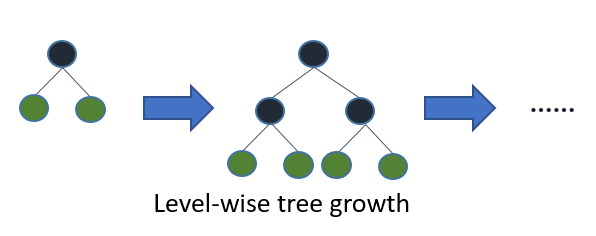


- 그러나 **LightGBM**은 일반적인 의사결정 트리와는 다른 성장 방식을 보입니다. 트리를 성장시킬 때, 노드(node)를 추가하는 것이 아닌 잎(leaf) 방향으로 먼저 성장시킵니다. 트리의 높이가 높아지는 **수직 방향의 성장**을 하는 것이지요. 이로써 효과적으로 학습 데이터를 분할하여 속도와 성능 면에서 이점을 가질 수 있습니다.


  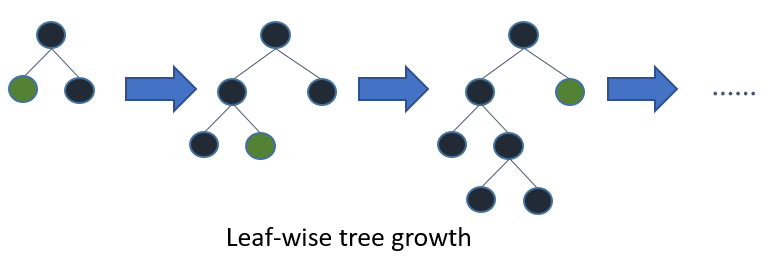


LightGBM의 장점은 다음과 같습니다.
- 훈련 속도가 빨라지고 효율성이 높아집니다.
- 메모리 사용량이 적습니다.
- 더 나은 정확성을 가집니다.
- 병렬, 분산 및 GPU 학습을 지원합니다.
- 대규모 데이터 처리가 가능합니다.

단점은 다음과 같습니다
- 다른 트리 모델보다 과적합(Overfitting)의 우려가 큽니다.
- 특히 데이터의 양이 적을 경우 과적합 되기 쉽습니다.


더 자세한 내용은 [LGBM 공식문서](https://lightgbm.readthedocs.io/en/latest/index.html)를 참고해 주세요!

### Pipeline 선언

먼저 pipeline을 선언합니다.

In [29]:
lgbm_cls = Pipeline(
    steps = [('preprocessor', preprocessor), ('lgbm', LGBMClassifier(n_jobs=1, objective='multiclass'))]
)

### GridSearchCV 선언

먼저 log_loss를 정의하였습니다. 사이킷런에서의 neg_log_loss를 사용할 수도 있지만, log_loss를 사용하되, make_scorer에서 `greater_is_better=False`를 지정하여 log_loss가 낮을수록 오차가 낮아야 함을 지정했습니다.

In [30]:
logloss = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

이어서 GridSearchCV에 전달할 하이퍼파라미터 딕셔너리를 정의한 뒤, 학습을 진행합니다.
<br>
params_grid에는 학습 간 시도해볼 파라미터의 개수 혹은 범위를 지정해주면 됩니다.
<br>
<br>
여기서는 GridSearchCV에게 Pipeline으로 학습하도록 전달했기 때문에, 각 파라미터 앞에 '<Pipeline에서 정의한 모델 명>__'을 붙여서 지정해주면 됩니다!

- Pipeline에서 LGBMClassifier를 'lgbm'이라고 명명해줬습니다.
- 만약 'max_depth'를 조절할 것이라면 'lgbm__max_depth'를 적어주면 됩니다.

In [31]:
params_grid = {
    'lgbm__n_estimators' : [350, 400, 450, 500],
    'lgbm__learning_rate' : np.linspace(0.005, 0.01, 5).round(4),
    'lgbm__max_depth' : list(range(15, 26, 2)),
    'lgbm__num_leaves' : list(map(lambda x: int(x), np.linspace(25, 300, 10).round()))
}


gbdt_grid = GridSearchCV(
    estimator= lgbm_cls,
    param_grid = params_grid,
    scoring = { 'accuracy' : 'accuracy',
                'logloss' : logloss,
    },
    refit = 'logloss',
    n_jobs = -1,
    cv = 5,
    verbose = 3,
    error_score='raise'
)

gbdt_grid.fit(X_data, y_data)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


[CV 1/5] END lgbm__learning_rate=0.005, lgbm__max_depth=15, lgbm__n_estimators=350, lgbm__num_leaves=25; accuracy: (test=0.693) logloss: (test=-0.793) total time=   2.9s
[CV 3/5] END lgbm__learning_rate=0.005, lgbm__max_depth=15, lgbm__n_estimators=350, lgbm__num_leaves=25; accuracy: (test=0.689) logloss: (test=-0.799) total time=   3.0s
[CV 2/5] END lgbm__learning_rate=0.005, lgbm__max_depth=15, lgbm__n_estimators=350, lgbm__num_leaves=25; accuracy: (test=0.692) logloss: (test=-0.795) total time=   3.0s
[CV 4/5] END lgbm__learning_rate=0.005, lgbm__max_depth=15, lgbm__n_estimators=350, lgbm__num_leaves=25; accuracy: (test=0.693) logloss: (test=-0.795) total time=   3.0s
[CV 5/5] END lgbm__learning_rate=0.005, lgbm__max_depth=15, lgbm__n_estimators=350, lgbm__num_leaves=25; accuracy: (test=0.693) logloss: (test=-0.795) total time=   3.0s
[CV 3/5] END lgbm__learning_rate=0.005, lgbm__max_depth=15, lgbm__n_estimators=350, lgbm__num_leaves=56; accuracy: (test=0.689) logloss: (test=-0.780)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('std',
                                                                         StandardScaler(),
                                                                         ['begin_month',
                                                                          'DAYS_BIRTH(year)',
                                                                          'DAYS_BIRTH(month)',
                                                                          'DAYS_BIRTH(week)',
                                                                          'DAYS_EMPLOYED(year)',
                                                                          'DAYS_EMPLOYED(month)',
                                                                          'DAYS_EMPLOYED(week)',
                                                                          'No_work(year)',
                                                                          'No_work(month)',
                                                                          'No_work(week)',
                                                                          '...
             n_jobs=-1,
             param_grid={'lgbm__learning_rate': array([0.005 , 0.0062, 0.0075, 0.0088, 0.01  ]),
                         'lgbm__max_depth': [15, 17, 19, 21, 23, 25],
                         'lgbm__n_estimators': [350, 400, 450, 500],
                         'lgbm__num_leaves': [25, 56, 86, 117, 147, 178, 208,
                                              239, 269, 300]},
             refit='logloss',
             scoring={'accuracy': 'accuracy',
                      'logloss': make_scorer(log_loss, greater_is_better=False, needs_proba=True)},
             verbose=3)

In [46]:
print("best score(log loss):", gbdt_grid.best_score_)

best score(log loss): -0.7094433480655473


In [39]:
grid_results = pd.DataFrame(gbdt_grid.cv_results_)
grid_results = grid_results.sort_values(by='rank_test_logloss')
grid_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1155       7.157290      0.155459         6.781460        0.287487   
1195       7.515412      0.064072         7.448335        0.235880   
1187       8.426350      0.064701         7.533417        0.294442   
1177       7.762311      0.192360         6.684654        0.200623   
1075       6.971048      0.084679         7.548393        0.252648   
...             ...           ...              ...             ...   
200        2.104131      0.074009         0.848162        0.101935   
80         2.017819      0.024970         0.805965        0.044005   
160        1.945827      0.049693         0.810125        0.044625   
40         1.876875      0.016505         0.778289        0.030764   
0          2.099065      0.031818         0.875804        0.033124   

     param_lgbm__learning_rate param_lgbm__max_depth param_lgbm__n_estimators  \
1155                      0.01                    23                      500   
1195                      0.01                    25                      500   
1187                      0.01                    25                      450   
1177                      0.01                    25                      400   
1075                      0.01                    19                      500   
...                        ...                   ...                      ...   
200                      0.005                    25                      350   
80                       0.005                    19                      350   
160                      0.005                    23                      350   
40                       0.005                    17                      350   
0                        0.005                    15                      350   

     param_lgbm__num_leaves  \
1155                    178   
1195                    178   
1187                    239   
1177                    239   
1075                    178   
...                     ...   
200                      25   
80                       25   
160                      25   
40                       25   
0                        25   

                                                 params  split0_test_accuracy  \
1155  {'lgbm__learning_rate': 0.01, 'lgbm__max_depth...              0.722222   
1195  {'lgbm__learning_rate': 0.01, 'lgbm__max_depth...              0.722978   
1187  {'lgbm__learning_rate': 0.01, 'lgbm__max_depth...              0.720333   
1177  {'lgbm__learning_rate': 0.01, 'lgbm__max_depth...              0.721277   
1075  {'lgbm__learning_rate': 0.01, 'lgbm__max_depth...              0.720144   
...                                                 ...                   ...   
200   {'lgbm__learning_rate': 0.005, 'lgbm__max_dept...              0.693500   
80    {'lgbm__learning_rate': 0.005, 'lgbm__max_dept...              0.693500   
160   {'lgbm__learning_rate': 0.005, 'lgbm__max_dept...              0.693500   
40    {'lgbm__learning_rate': 0.005, 'lgbm__max_dept...              0.693500   
0     {'lgbm__learning_rate': 0.005, 'lgbm__max_dept...              0.693500   

      ...  std_test_accuracy  rank_test_accuracy  split0_test_logloss  \
1155  ...           0.002882                   7            -0.710649   
1195  ...           0.003443                  60            -0.710976   
1187  ...           0.002019                  35            -0.715666   
1177  ...           0.001256                  84            -0.714169   
1075  ...           0.001053                  51            -0.714792   
...   ...                ...                 ...                  ...   
200   ...           0.001454                1197            -0.793460   
80    ...           0.001454                1197            -0.793460   
160   ...           0.001454                1197            -0.793460   
40    ...           0.001456                1196            -0.793460   
0     ...           0.001489               

## 사후분석

GridSearchCV의 결과를 바탕으로 성능에 주요 영향을 미친 하이퍼파라미터는 어떤 것이였는지 알아보겠습니다.

- accuracy는 보조지표로 활용하였습니다.

In [47]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def visualize_score(grid_results, by='param_lgbm__learning_rate'):


    fig = make_subplots(rows=1, cols=2, subplot_titles=['log_loss', 'accuracy'])

    fig.add_trace(
        go.Scatter(
                   x=grid_results[by],
                   y=grid_results['mean_test_logloss'],
                   mode='markers',
                   ),
        row=1, col=1,
    )

    fig.add_trace(
        go.Scatter(
                   x=grid_results[by],
                   y=grid_results['mean_test_accuracy'],
                   mode='markers',
                   ),
        row=1, col=2
    )
    fig.update_layout(height=500, width=1000, title_text=f"{by} 기준 점수 비교")

    # fig = visualize_logloss_accuracy(grid_results, by=by)
    fig.show()

In [48]:
visualize_score(grid_results, by='param_lgbm__learning_rate')

learning_rate의 경우, 0.01일 때가 근소하게 성능이 더 좋았습니다.
- 이전에 실험 단계에서는 0.005부터 1.0까지 비교적 넓은 범위에서 GridSearchCV를 진행했었는데, 이때는 낮을수록 더 좋은 성능이 나왔었습니다.

In [41]:
visualize_score(grid_results, by='param_lgbm__n_estimators')

n_estimator의 경우, logloss 값이 전반적으로 -0.710 ~ -0.709 사이에서 최대값이 형성되어 있습니다.

In [42]:
visualize_score(grid_results, by='param_lgbm__max_depth')

max_depth는 logloss 기준 -0.700 ~ -0.711 사이에서 최댓값이 형성되어 있습니다.

In [43]:
visualize_score(grid_results, by='param_lgbm__num_leaves')

num_leaves가 흥미로운데요, 이때는 num_leaves == 178일 때가 가장 좋았고, 그 이하일 때는 값이 클수록 더 좋은 성능으로 이어졌습니다.
- 하지만 178을 넘어가면 비등비등하거나 값이 오히려 감소하는 모습을 보여주었습니다.

# Submisssion

In [49]:
best_lgbm = gbdt_grid.best_estimator_

y_pred = best_lgbm.predict_proba(test_df)

prediction = pd.DataFrame(y_pred)
prediction

0         1         2
0     0.136386  0.142681  0.720933
1     0.185980  0.293763  0.520257
2     0.045365  0.098639  0.855997
3     0.092841  0.058505  0.848654
4     0.120133  0.169885  0.709982
...        ...       ...       ...
9995  0.058232  0.131959  0.809809
9996  0.169724  0.243424  0.586852
9997  0.064217  0.112779  0.823004
9998  0.141693  0.298325  0.559982
9999  0.119215  0.191174  0.689612

[10000 rows x 3 columns]

In [52]:
submission_csv = pd.read_csv('/Users/GitHub/Projects/AI_Project/07_daycrew6th/raw data/open/sample_submission.csv')
submission_csv.iloc[:, 1:] = prediction

submission_csv

index         0         1         2
0     26457  0.136386  0.142681  0.720933
1     26458  0.185980  0.293763  0.520257
2     26459  0.045365  0.098639  0.855997
3     26460  0.092841  0.058505  0.848654
4     26461  0.120133  0.169885  0.709982
...     ...       ...       ...       ...
9995  36452  0.058232  0.131959  0.809809
9996  36453  0.169724  0.243424  0.586852
9997  36454  0.064217  0.112779  0.823004
9998  36455  0.141693  0.298325  0.559982
9999  36456  0.119215  0.191174  0.689612

[10000 rows x 4 columns]

In [54]:
submission_csv.to_csv('submission_네모시.csv', index=False)